# SN: 18016575 
# Final Project: The infinite "unsquare" potential 


This report details an investigation into the energy eigenstates of a quantum dot under various conditions. The research builds on the coding work conducted during session 8. The first section of the notebook focuses on the computational analysis of the energy eigenstates of a quantum dot in infinite square potential, using the Runge-Kutta method and the secant method. Second section of the notebook will discover different types of potential and expand on the numerical analysis method utilised in the first section. The report aims to contribute to the understanding of quantum mechanics and provides insights into the behavior of quantum dots. 

# 1.Introduction

Quantum dots exhibit unique quantum mechanical behavior due to confinement resulting from their small size. These nanoscale systems are of interest in both fundamental physics and technological applications such as quantum computing and solar cells. Discrete spectra in electronic and optical properties result from the confinement of electrons in a small region of space, leading to quantised energy levels. 

This notebook investigates several scenarios of a quantum dot [1], beginning with the simplest case of a one-dimensional quantum dot under infinite square well potential. Subsequently, the impact of different potentials on energy levels and wavefunctions of the electron, such as harmonic and square well potentials, are examined. Numerical techniques are employed to solve the Schrödinger equation for each potential, and the resulting energy spectra and wavefunctions are analysed.

The overall aim of this notebook is to understand the physics of quantum dots utilising numerical methods in solving quantum mechanical problems.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 2. Quantum Dot
## 2.1 Finding the ground state energy


This notebook first explores the ground state energy eigenstate in a quantum dot. The quantum dot can be modeled as a boundary problem, where the boundary of the dot ,the diameter, confines the charge carriers. To start the investigation, we will study a one-dimensional infinite quantum well, which provides a simplified model for the quantum dot.

To begin, the necessary constants for calculations and the boundary conditions of the potential well are defined.

In [2]:
# Defining the Constants

m = 9.109383702 * 10 ** -31        # Mass of electron (Kg)
hbar = 1.054571871 * 10 ** -34     # Reduced Plank's constant (m^2 Kg / s)
e = 1.602176634 * 10 ** -19        # Electron charge (C)



# Defining our quantum well size

d = 5 * 10 ** -9                  # Diameter of quantum dot (m)
n = 2000                          # Number of x points
h= d / n                          # Step value of our x range (m)
a = d / 2                         # Boundary position (m)
xstart = - a
xend = a
xrange = np.arange(xstart, xend, h) 

The infinite quantum well is a system where the potential is zero within the boundaries and infinite outside of them, as shown in Equation (1). To describe the behavior of charge carriers within the potential well, we use the Schrödinger equation, a second-order differential equation, as shown in Equation (2).

$$ V_x = \begin{cases} 0 & \text{if } -a \leq x \leq +a, \\    
\infty  & \text{if } |x| > a, \end{cases}  \qquad 
(1)\qquad  [2]
$$


$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x)    \qquad 
(2) \qquad [2]
$$



In [3]:
def qpotential (x):
    """This function returns the potential value at given position x
    Input:
    x (Type: float)(units: m) position value
    
    Output:
    0.0 (Type: float)(units: J) potential value at given point """
    return 0.0


Since the solution of the Schrödinger wavefunction show that the probability of finding the charge carrier in the region where the potential $V(x)$ is zero, the solution will be subjected to a boundary of $\psi = 0 $ at $x = -a$ and $x = a $. This boundary allows the numerical solution to be found using numerical analysis methods such as the Runge-Kutta method shown below.

$$
k_1 = h f(x,t), \qquad (3.a)\\
k_2 = h f(x+\frac{1}{2}k_1, t+\frac{1}{2}h),  \qquad (3.b) \\
k_3 = h f(x+\frac{1}{2}k_2, t+\frac{1}{2}h), \qquad (3.c) \\
k_4 = h f(x+k_3, t+h), \qquad (3.d) \\
x(t+h) = x(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).\qquad (3.e) 
 \qquad [2] [3]
$$

In this example, the two dimensional Runge-Kutta method could be used by splitting the Schrödinger  equation into two first-order differential equations, Equation (4) and (5). 

$$
\frac{d \psi}{dx } = \phi,  \qquad 
(4)  \qquad [2]
$$
$$
\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x) \qquad 
(5)  \qquad [2]
$$



In [4]:
# Code reused from SN:18016575 Cocalc notebook "Assignment C7 Solving 2nd order ODEs" [3][4] 
def RungeKutta2d(function,E):
    '''Fourth-order Runge-Kutta rewritten for two or more simultaneous equations
    Inputs: 
    function: (Type: function) (Unit: unitless) the function used to solve the system 
    E: (Type: float) (Unit: J) input energy value 
            
    Outputs: 
    [xpoints]: (Type: array) (Unit: unitless) psi values in an array'''
    
    xpoints = []                                        # Initialise empty arrays
    psi = 0.0                                           # Initial conditions
    phi = 1.0
    r = np.array([psi,phi],float)
    
    # RungeKutta calculations
    for i in xrange:
        xpoints.append(r[0])
        k1 = h*function(r,i,E)
        k2 = h*function(r+0.5*k1,i+0.5*h,E)
        k3 = h*function(r+0.5*k2,i+0.5*h,E)
        k4 = h*function(r+k3,i+h,E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    xpoints.append(r[0])
    return np.array([xpoints]) 


The initial condition of the RungeKutta method is set by the value of $\phi$. Altering the value of $\phi$ can potentially result in a change of the solution obtained from the Schrodinger wavefunction. Consequently, such a change may lead to the modification of the behavior of the quantum state, which is defined by the wavefunction.

In [5]:
def schrodinger(r,x,E): 
    '''Function splitting the Schordinger equation into two ODEs and calculating the values for psi and phi wavefunctions
    Inputs:
    r: vector of wavefunction value of psi (r[0]) and wave function value of phi (r[1]) (Type: 2D- array) (Units: unitless)
    x: xrange required by the form of our general Runge Kutta function (Type: list) (Units: m)
    E: Energy value (Type: float) (Units: J)
    
    Output:
    np.array([fpsi,fphi]): Array of each differential values of our ODEs (Type: np.array) (Units: unitless)
    '''
    psi = r[0]                                              # psi wave function
    phi = r[1]                                             # phi wave function
    fpsi = phi                                             # dpsi/dx is phi Equation (4)
    fphi = 2 * m / (hbar **2) * (qpotential(x)- E) * psi  # dphi/dx Equation (5)
    return np.array([fpsi,fphi])                          

As the Schrödinger equation is an eigenvalue equation, solutions exist only at certain energy values $E$. This implies that rather than looking for an initial condition of $\phi$, the secant method is used to search for the energy value $E$. The process begins by guessing an initial energy level and solving the Schrödinger equation for that energy. The secant method is then applied to identify the energy eigenvalue that satisfies the boundary conditions.

Once the ground state energy has been found using the secant method, the resulting numerical solution can be compared to the analytical solution of the ground state energy. The analytical solution for the energy eigenvalues of the system under zero potential is presented below.

$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2}\qquad
(6) \qquad [2]
$$



In [6]:
# Code reused from SN:18016575 Cocalc notebook "Assignment C8 Secant Method" [4] 

# Define the initial conditions
E1 = 0                         # guess 1 of energy
E2 = e/50                      # guess 2 of energy 

# Solve for the first guess

psi1 = RungeKutta2d(schrodinger,E1)[0,n]


psi2 = RungeKutta2d(schrodinger,E2)[0,n]

# The Secant Method

tolerance = e/100000               # Setting the tolerance for convergence
while abs(E2-E1) > tolerance:
    E3 = E2 - psi2*(E2-E1)/(psi2-psi1)
    # Update initial energy for the next iteration
    E1 = E2
    E2 = E3
    # Rcalculating positions
    psi1 = RungeKutta2d(schrodinger,E1)[0,n]
    psi2 = RungeKutta2d(schrodinger, E2)[0,n]

    
print(f"The estimated ground state energy level is: {E3:.3e}J and in eV it is: {E3/e:.3f}eV")

Et= (np.pi ** 2) * (hbar ** 2) / 2 / m / (d ** 2)   # Equation (6)
print(f"The analytical ground state energy level is: {Et:.3e}J and in eV it is: {Et/e:.3f}eV")

The estimated ground state energy level is: 2.410e-21J and in eV it is: 0.015eV
The analytical ground state energy level is: 2.410e-21J and in eV it is: 0.015eV


## 2.2 Plotting the ground state wavefunction



The wave function of the ground state energy level is expected to have the shape of a half-period sine wave, which can be observed in the plot below.

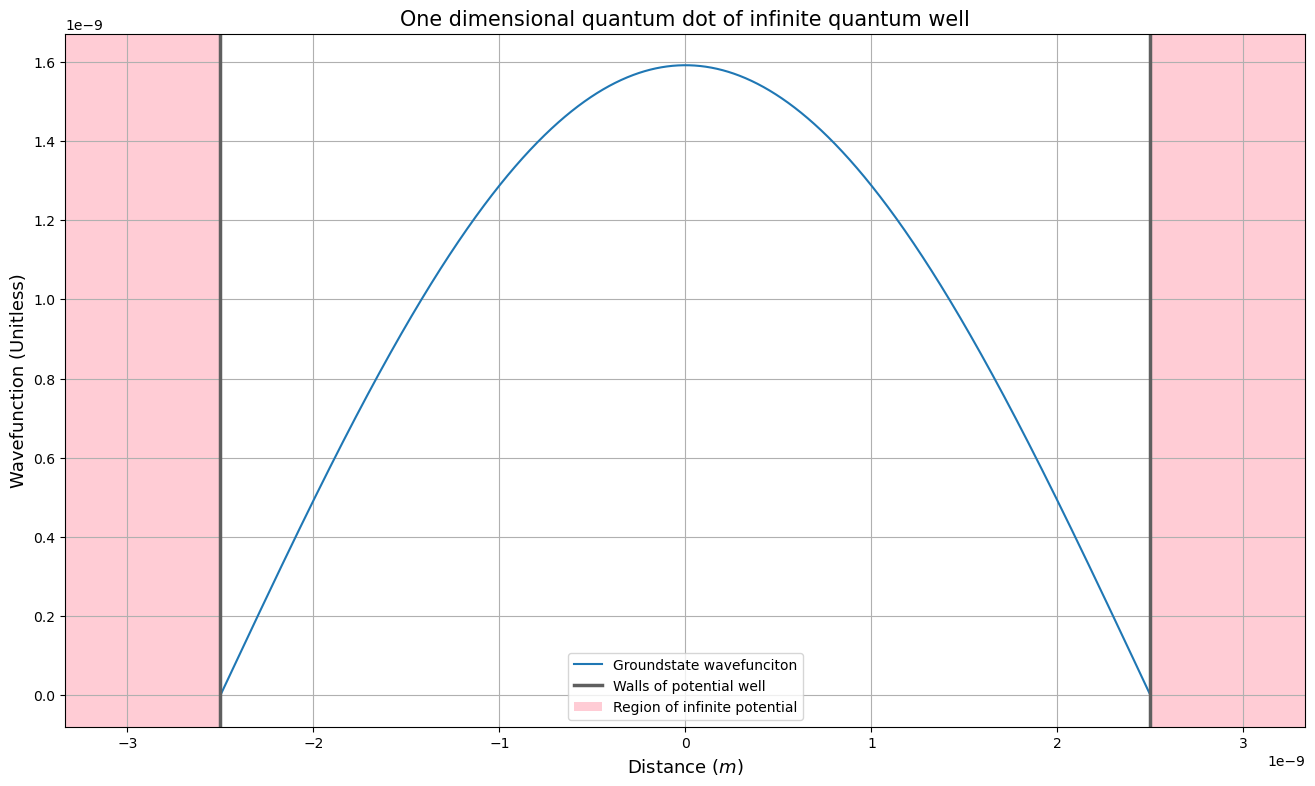

In [7]:
xplotpoints = np.arange(xstart, xend+h, h)  # Setting x plot points
plt.figure(figsize = (16,9))
plt.plot(xplotpoints,RungeKutta2d(schrodinger,E3)[0], label="Groundstate wavefunciton")
plt.title("One dimensional quantum dot of infinite quantum well" ,fontsize= 15)
plt.ylabel("Wavefunction (Unitless)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.axvline(x=-a,c= '#5f5f5f',ls='-',lw=2.5)                                # Potential walls
plt.axvline(x=a,c= '#5f5f5f',ls='-',lw=2.5,label= 'Walls of potential well')
plt.xlim(left = -2*d/3, right=2*d/3)
plt.axvspan( -a,-2*d/3, color='pink', alpha=0.8, lw=0, label = "Region of infinite potential")  # Potential regions
plt.axvspan( a,2*d/3, color='pink', alpha=0.8, lw=0)
plt.grid()
plt.legend();

## 2.3 Normalising the wavefunction

As the ground state energy level wavefunction plotted above is not normalised, the normalising factor must be calculated. For a wave function to be normalised, it must satisfy Equation (7).
$$
\int_{-\infty}^{\infty} | \psi(x) |^2 {\rm d} x = 1  \qquad
(7) \qquad [2]
$$

As the wavefunction values are in the form of a numpy array, the trapezoidal rule (Equation (8)) can be used to calculate the left hand side of Equation (7). 

$$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{n-1}f(x + kh) \right] \qquad
      (8) \qquad [2]
$$



In [8]:
def Integral(x, h):
    '''Function calculating the integral using the trapezoidal rule.
    Inputs:
    x: array of psi values (r[1]) (Type: array) (Units: unitless)
    h: step between each x point (Type: float) (Units: m)
    
    Output:
    I : Value of the Integral (Type: float) (Units: unitless)
    '''
    I = h * (x[0] / 2 + x[-1] / 2 + np.sum(x[1:-1]))
    return I

Analytically, the normalised wavefunctions of the infinite potential well are known to be:

$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{odd} \ \qquad(9.a) \qquad [2]
    $$
    $$
    \psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even} \ \qquad(9.b) \qquad [2]
$$
where $n$ is the energy level of the wavefunction

In [9]:
def theory(x,n,d):
    '''Function calculating the analytic solution of the infinite potential well of energy level n
    Input:
    x: array of position values (Type: array) (Units: m)
    n: energy level of the wavefunction (Type: Integer) (Units: unitless)
    d: diameter of the infinite quantum well (Type: float) (Units: m)
    
    Output:
    wav : The wavefunction of energy level n (Type: array) (Units: unitless)
    '''
    if n % 2 == 0:
        wav = 1/np.sqrt(d/2) * np.sin(n * np.pi * x / d)                     # Equation (9.b)
    elif n % 2 == 1:
        wav = 1/np.sqrt(d/2) * np.cos(n * np.pi * x / d)                     # Equation (9.a)
    else: raise TypeError("Only non-zero Integers are available")
    
    return wav

In [10]:
def theoryE(n,a):
    '''Function calculating the analytic energy eigenstate of the infinite potential well Equation (6)
    n: energy level (Type: Integer) (Units: unitless)
    a: half the diameter of the infinite quantum well (Type: float) (Units: m)
    
    Output:
    En : The energy value of the energy level n (Type: float) (Units: J)
    '''
    En =(np.pi ** 2) * (hbar **2) * (n**2) / 2 / m / (2*a)**2     # Equation (6)
    
    return En

Plotting the normalised ground state wavefunction against the analytic normalised ground state wavefunction shows a perfect match.

Calculated groundstate energy is: 2.410e-21 J or 0.015 eV
Analytical solution of groundstate energy is: 2.410e-21 J or 0.015 eV


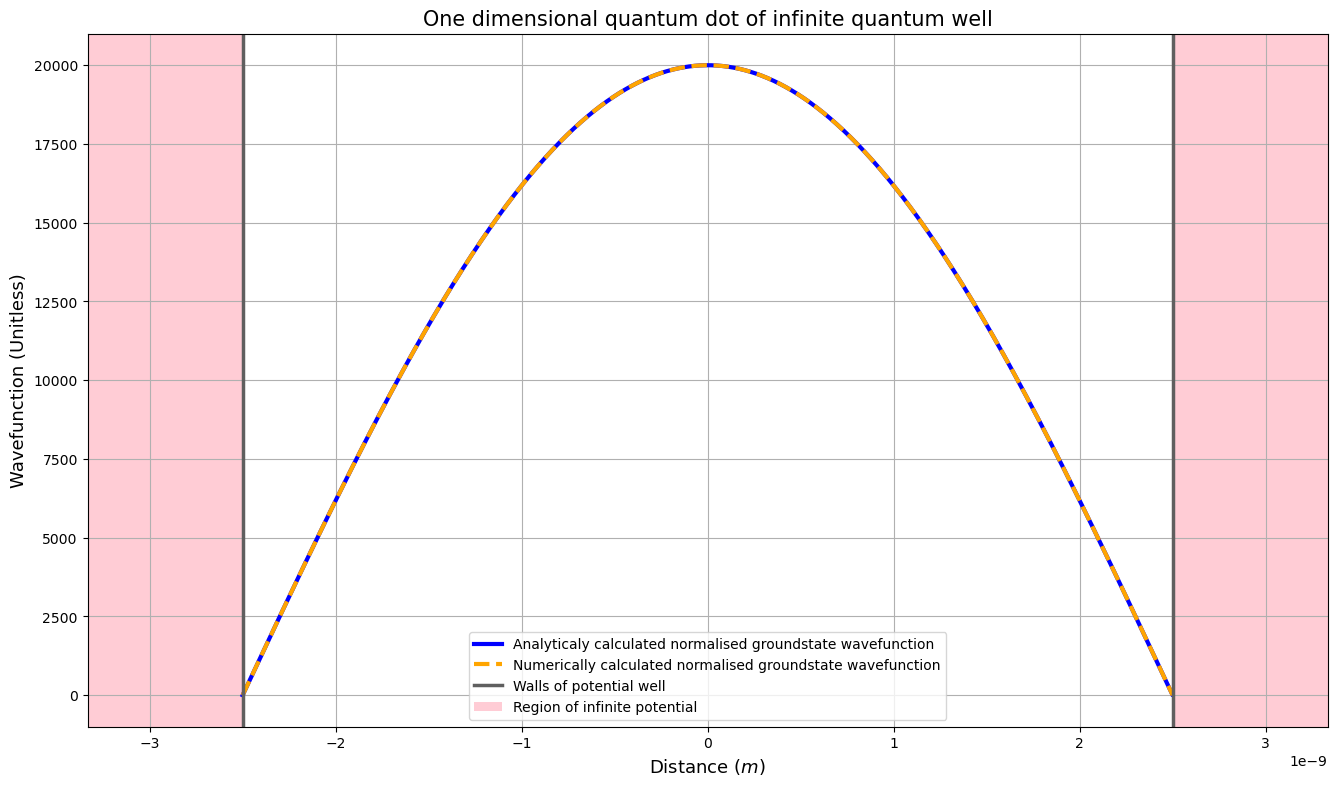

In [11]:
E3I = Integral(np.abs(RungeKutta2d(schrodinger,E3)[0])**2,h)
normwave1 = RungeKutta2d(schrodinger,E3)[0] / np.sqrt(E3I)

print(f"Calculated groundstate energy is: {E3:.3e} J or {E3/e:.3f} eV")      
print(f"Analytical solution of groundstate energy is: {theoryE(1,a):.3e} J or {theoryE(1,a)/e:.3f} eV")      


plt.figure(figsize = (16,9))
plt.plot(xrange,theory(xrange,1,d),lw =3,c='blue',label = 'Analyticaly calculated normalised groundstate wavefunction')

plt.plot(xplotpoints,normwave1,lw = 3,ls = "--",c= 'orange',label='Numerically calculated normalised groundstate wavefunction')

plt.title("One dimensional quantum dot of infinite quantum well" ,fontsize= 15)
plt.ylabel("Wavefunction (Unitless)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.axvline(x=-a,c= '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c= '#5f5f5f',ls='-',lw=2.5,label= 'Walls of potential well')
plt.xlim(left = -2*d/3, right=2*d/3)
plt.axvspan( -a,-2*d/3, color='pink', alpha=0.8, lw=0, label = "Region of infinite potential")
plt.axvspan( a,2*d/3, color='pink', alpha=0.8, lw=0)
plt.grid()
plt.legend();

## 2.4 Finding higher energy states

Although it is possible to adapt a method using the analytic solution (Equation (8a),(8b)) to set a probable guess for higher energy levels, this method will not work as a general solution for unknown potentials. This is because energy levels are different for every potential, and by using the analytical solution as a guess for the higher energy level, the guess might over estimate or underestimate the desired energy eigenstate.

To find a more general method of finding higher energy eigenstates of the quantum dot, a modified version of the secant procedure was used. The secant method is calculated within a loop that calculates the energy level and appends the newly found value into a list containing the values of the energy levels. After the loop calculates the ground state energy level, it changes the boundaries used in the secant method to find the next energy eigenstate. This procedure is iterated until the desired number of energy eigenstates are obtained.
 
The procedure is based on the assumption that the energy gap between two energy eigenstates in any potential is greater than or equal to the energy difference between the adjacent energy eigenstates found in the previous iteration. To avoid convergence to the previously found energy eigenstate, the lower boundary of the secant method is set to the last element of the energy level list. Additionally, an if statement is used to check if the newly found energy level is within the tolerance level from the previously found energy eigenstate, and if it is not, the newly found energy level is appended as an energy eigenstate. If the newly found energy level is within the tolerance level from the previously found energy eigenstate, the secant method is applied again with a higher energy boundary increased by a factor $j$. This makes sure that there are no energy eigenstates that are missed with our numerical calculation.

There are two problems with this method. The first problem is that it assumes the energy gap between two energy eigenstates in any potential will be greater than or equal to the energy difference between the adjacent energy eigenstates found in the previous iteration. Although this is true for all the potentials covered in this notebook, it might not hold true for other types of potentials. Second problem is that the secant method relies on a tolerance level,causing a boundary issue to cause miscalculation for higher energy eigenstates.



Newly found energy level 2 is approximately equal to energy level 1. Recalculating with higher boundary values.
Energy level 2 is: 9.639e-21 J or 0.060 eV


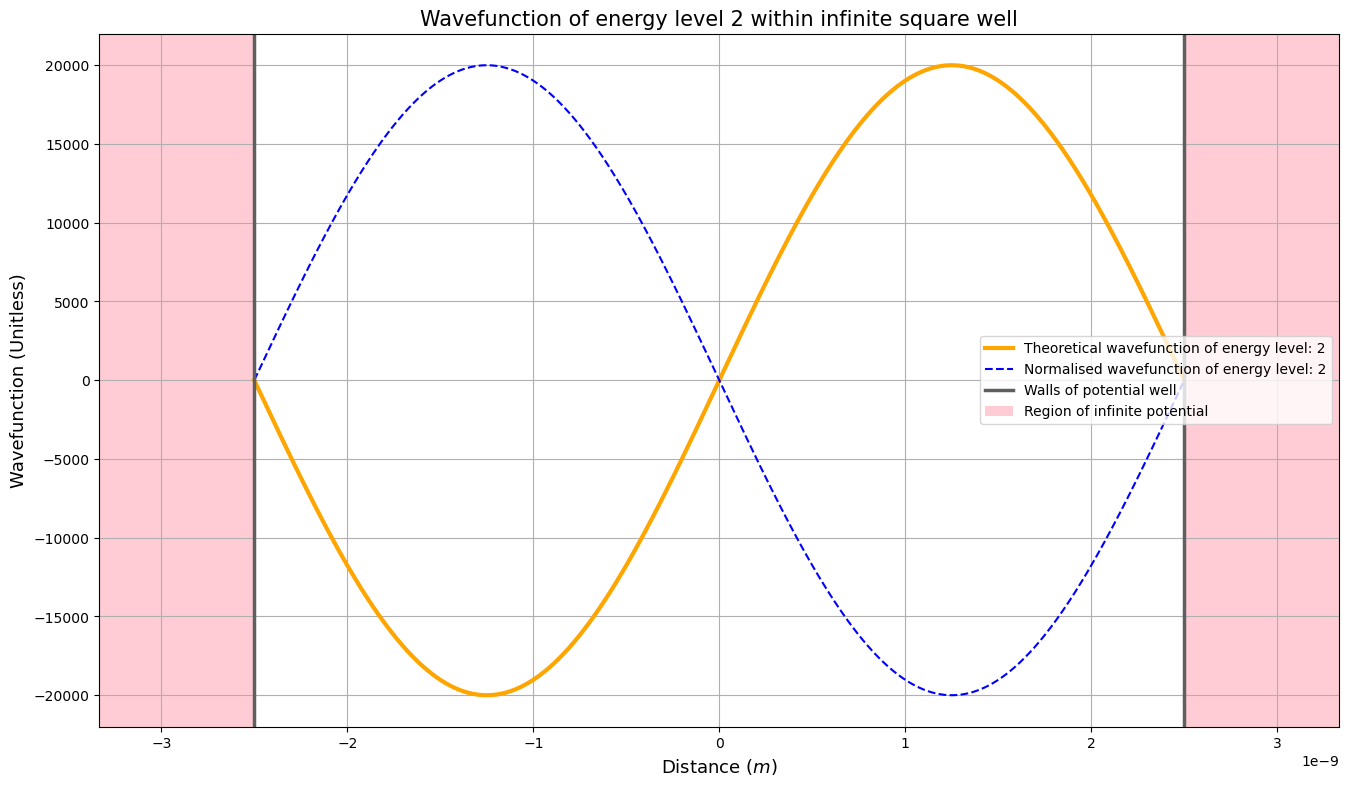

In [12]:
# Energy Level 2
En = 2                                    # Desired energy eigenstate
Enlevels=[0]                              # List of energy eigenstates


En_l = 0                                  # Initial boundaries for the secant method                        
En_h = e / 50                    
j=1                                       # Factor value for energy boundaries

# This loop iterates the secant method until the desired amount of energy eigenstaes are found
while len(Enlevels) < En + 1 :                              # En + 1 because 0 is present in the list                              
    psi1 = RungeKutta2d(schrodinger,En_l)[0,n]

    psi2 = RungeKutta2d(schrodinger,En_h)[0,n]

    tolerance = e/1000000                                   # Tolerance for convergence
    # Secant method
    while abs(En_h - En_l) > tolerance:
        Elvl = En_h - psi2 * (En_h - En_l)/(psi2-psi1)
        # update initial energy for the next iteration
        En_l = En_h
        En_h = Elvl
        # and recalculate positions
        psi1 = RungeKutta2d(schrodinger,En_l)[0,n]
        psi2 = RungeKutta2d(schrodinger,En_h)[0,n]
        
    # If statement checking if the newly found energy is unique (A higher energy level)   
    if abs(Elvl - Enlevels[-1]) >= tolerance:              
        Enlevels.append(Elvl)
        j=1
        En_l = 0
        En_h = Enlevels[-1] + (Enlevels[-1] - Enlevels[-2])
        
    # Checking if the newly found energy is equal to the previously found energy
    else:                                                
        if abs(Elvl - Enlevels[-1]) < tolerance:
            print(f"Newly found energy level {len(Enlevels)} is approximately equal to energy level {len(Enlevels)-1}." 
                  " Recalculating with higher boundary values.")
        j= j + 0.5            # Factor increasing the upper boundary everytime the boundary was underestimated
        En_l = 0
        En_h = Enlevels[-1] + (Enlevels[-1] - Enlevels[-2]) * (j)  # Setting a higher guessed boundary
        

print(f"Energy level {len(Enlevels) -1} is: {Enlevels[-1]:.3e} J or {Enlevels[-1]/e:.3f} eV")       

# Normalising the wavefunction
I = Integral(np.abs(RungeKutta2d(schrodinger,Enlevels[-1])[0])**2,h)
normwave = RungeKutta2d(schrodinger,Enlevels[-1])[0] / np.sqrt(I)

# Plotting the wavefunction within the confinement
plt.figure(figsize = (16,9))
plt.plot(xrange,theory(xrange,len(Enlevels) -1,d),lw =3,c='orange',
         label = (f'Theoretical wavefunction of energy level: {len(Enlevels) -1}'))
plt.plot(xplotpoints,normwave,ls = "--",c= 'blue',label=(f'Normalised wavefunction of energy level: {len(Enlevels) -1}'))

plt.title(f"Wavefunction of energy level {len(Enlevels) -1} within infinite square well" ,fontsize= 15)
plt.ylabel("Wavefunction (Unitless)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.axvline(x=-a,c= '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c= '#5f5f5f',ls='-',lw=2.5,label= 'Walls of potential well')
plt.xlim(left = -2*d/3, right=2*d/3)
plt.axvspan(-a,-2*d/3, color='pink', alpha=0.8, lw=0, label = "Region of infinite potential")
plt.axvspan(a,2*d/3, color='pink', alpha=0.8, lw=0)
plt.grid()
plt.legend();

Newly found energy level 2 is approximately equal to energy level 1. Recalculating with higher boundary values.
Energy level 3 is: 2.169e-20 J or 0.135 eV


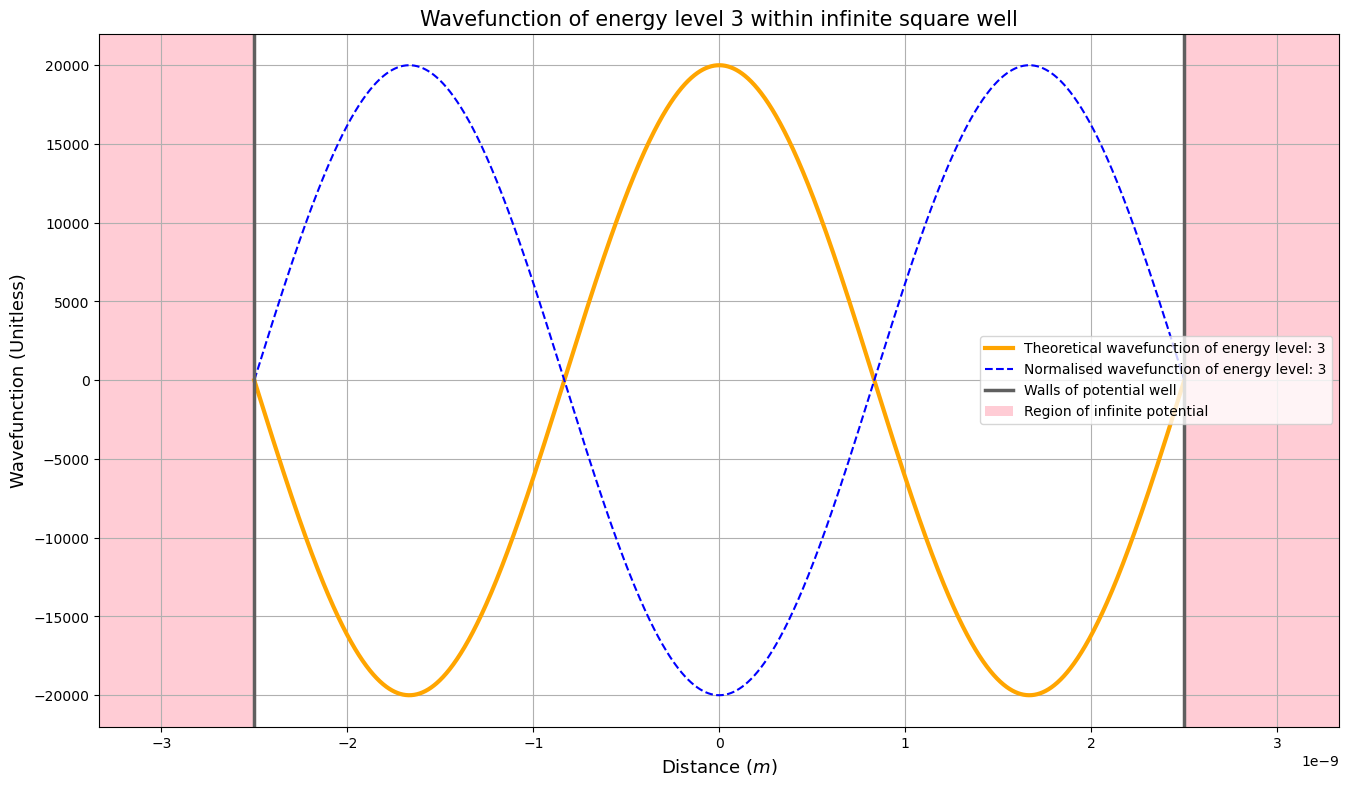

In [13]:
En = 3                                    # Desired energy level 
Enlevels=[0]                              # List of energy levels 


En_l = 0                                  # Initial boundaries for the secant method                        
En_h = e / 50                    
j=1                                       # Factor value for energy boundaries

# This loop iterates the secant method until the desired amount of energy level is found
while len(Enlevels) < En + 1 :                              # En + 1 because 0 is present in the list                              
    psi1 = RungeKutta2d(schrodinger,En_l)[0,n]

    psi2 = RungeKutta2d(schrodinger,En_h)[0,n]

    tolerance = e/1000000                                   # Tolerance for convergence
    # Secant method
    while abs(En_h - En_l) > tolerance:
        Elvl = En_h - psi2 * (En_h - En_l)/(psi2-psi1)
        # update initial energy for the next iteration
        En_l = En_h
        En_h = Elvl
        # and recalculate positions
        psi1 = RungeKutta2d(schrodinger,En_l)[0,n]
        psi2 = RungeKutta2d(schrodinger,En_h)[0,n]
        
    # If statement checking if the newly found energy is unique (A higher energy level)   
    if abs(Elvl - Enlevels[-1]) >= tolerance:              
        Enlevels.append(Elvl)
        j=1
        En_l = 0
        En_h = Enlevels[-1] + (Enlevels[-1] - Enlevels[-2])
        
    # Checking if the newly found energy is equal to the previously found energy
    else:                                                
        if abs(Elvl - Enlevels[-1]) < tolerance:
            print(f"Newly found energy level {len(Enlevels)} is approximately equal to energy level {len(Enlevels)-1}. " 
                 "Recalculating with higher boundary values.")
        j= j + 0.5            # Factor increasing the upper boundary everytime the boundary was underestimated
        En_l = 0
        En_h = Enlevels[-1] + (Enlevels[-1] - Enlevels[-2]) * (j)  # Setting a higher guessed boundary
        

print(f"Energy level {len(Enlevels)-1} is: {Enlevels[-1]:.3e} J or {Enlevels[-1]/e:.3f} eV")       

# Normalising the wavefunction
I = Integral(np.abs(RungeKutta2d(schrodinger,Enlevels[-1])[0])**2,h)
normwave = RungeKutta2d(schrodinger,Enlevels[-1])[0] / np.sqrt(I)

# Plotting the wavefunction within the confinement
plt.figure(figsize = (16,9))
plt.plot(xrange,theory(xrange,len(Enlevels) -1,d),lw =3,c='orange',
         label = (f'Theoretical wavefunction of energy level: {len(Enlevels) -1}'))
plt.plot(xplotpoints,normwave,ls = "--",c= 'blue',label=(f'Normalised wavefunction of energy level: {len(Enlevels) -1}'))

plt.title(f"Wavefunction of energy level {len(Enlevels) -1} within infinite square well" ,fontsize= 15)
plt.ylabel("Wavefunction (Unitless)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.axvline(x=-a,c= '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c= '#5f5f5f',ls='-',lw=2.5,label= 'Walls of potential well')
plt.xlim(left = -2*d/3, right=2*d/3)
plt.axvspan( -a,-2*d/3, color='pink', alpha=0.8, lw=0, label = "Region of infinite potential")
plt.axvspan( a,2*d/3, color='pink', alpha=0.8, lw=0)
plt.grid()
plt.legend();

The plots for energy level 2 and energy level 3 do not align with the theoretical wavefunction calculated with analytical methods. However, it is important to note that this discrepancy is caused by the normalisation. The normalisation method utilises the trapezoidal rule, which involves squaring the absolute value of the wavefunction. This process causes the sign of the wavefunction to flip, resulting in a phase difference of $\pi$. Despite the phase difference, the squared values of the two wavefunctions are equivalent, resulting in the same probability of finding the free charge carrier within the well for each wave function.

Newly found energy level 2 is approximately equal to energy level 1. Recalculating with higher boundary values.
Energy level 4 is: 3.856e-20 J or 0.241 eV


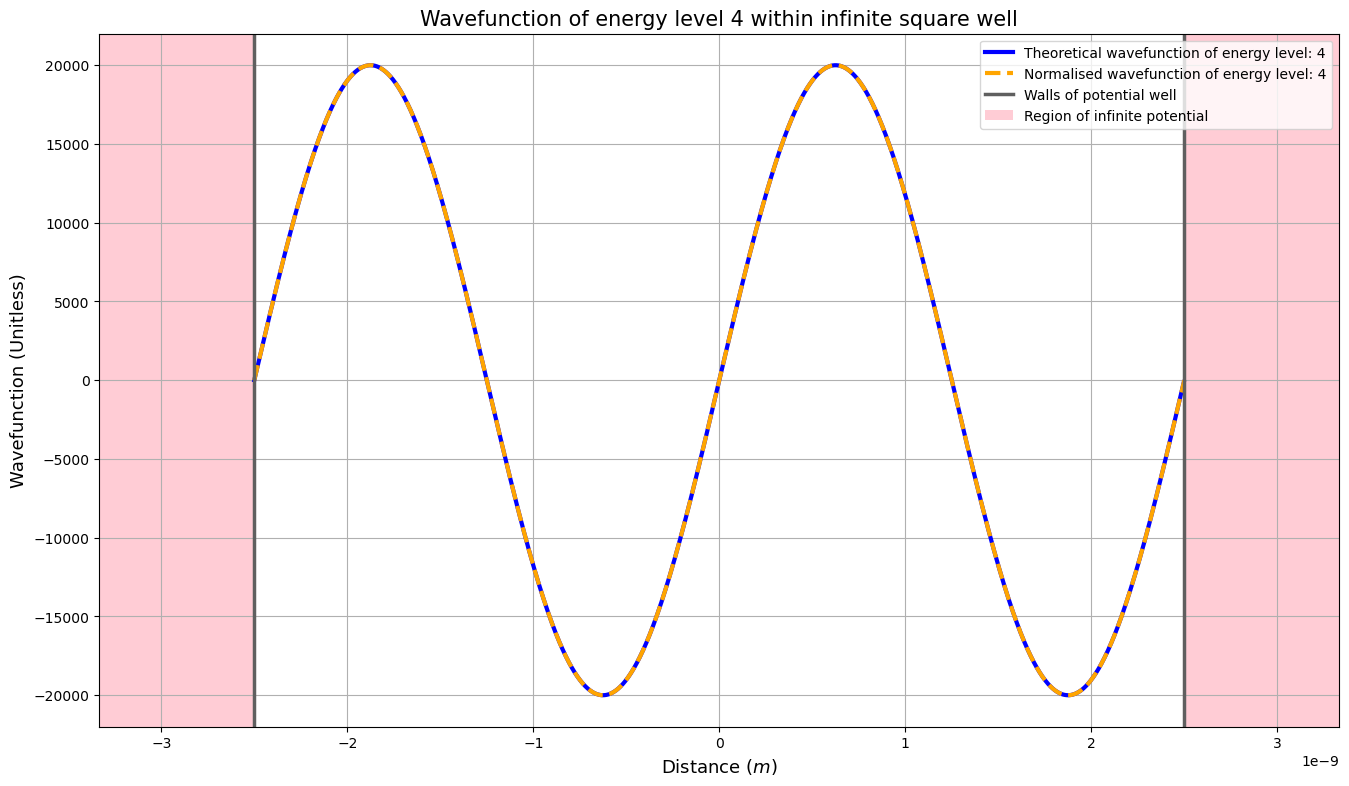

In [14]:
En = 4                                  # Desired energy level 
Enlevels=[0]                              # List of energy levels 


En_l = 0                                  # Initial boundaries for the secant method                        
En_h = e / 50                    
j=1                                       # Factor value for energy boundaries

# This loop iterates the secant method until the desired amount of energy level is found
while len(Enlevels) < En + 1 :                              # En + 1 because 0 is present in the list                              
    psi1 = RungeKutta2d(schrodinger,En_l)[0,n]

    psi2 = RungeKutta2d(schrodinger,En_h)[0,n]

    tolerance = e/1000000                                   # Tolerance for convergence
    # Secant method
    while abs(En_h - En_l) > tolerance:
        Elvl = En_h - psi2 * (En_h - En_l)/(psi2-psi1)
        # update initial energy for the next iteration
        En_l = En_h
        En_h = Elvl
        # and recalculate positions
        psi1 = RungeKutta2d(schrodinger,En_l)[0,n]
        psi2 = RungeKutta2d(schrodinger,En_h)[0,n]
        
    # If statement checking if the newly found energy is unique (A higher energy level)   
    if abs(Elvl - Enlevels[-1]) >= tolerance:              
        Enlevels.append(Elvl)
        j=1
        En_l = 0
        En_h = Enlevels[-1] + (Enlevels[-1] - Enlevels[-2])
        
    # Checking if the newly found energy is equal to the previously found energy
    else:                                                
        if abs(Elvl - Enlevels[-1]) < tolerance:
            print(f"Newly found energy level {len(Enlevels)} is approximately equal to energy level {len(Enlevels)-1}."
                  " Recalculating with higher boundary values.")
        j= j + 0.5            # Factor increasing the upper boundary everytime the boundary was underestimated
        En_l = 0
        En_h = Enlevels[-1] + (Enlevels[-1] - Enlevels[-2]) * (j)  # Setting a higher guessed boundary
        

print(f"Energy level {len(Enlevels)-1} is: {Enlevels[-1]:.3e} J or {Enlevels[-1]/e:.3f} eV")       

# Normalising the wavefunction
I = Integral(np.abs(RungeKutta2d(schrodinger,Enlevels[-1])[0])**2,h)
normwave = RungeKutta2d(schrodinger,Enlevels[-1])[0] / np.sqrt(I)

# Plotting the wavefunction within the confinement
plt.figure(figsize = (16,9))
plt.plot(xrange,theory(xrange,len(Enlevels) -1,d),lw =3,c='blue',
         label = (f'Theoretical wavefunction of energy level: {len(Enlevels) -1}'))
plt.plot(xplotpoints,normwave,lw = 3,ls = "--",c= 'orange',label=(f'Normalised wavefunction of energy level: {len(Enlevels) -1}'))

plt.title(f"Wavefunction of energy level {len(Enlevels) -1} within infinite square well" ,fontsize= 15)
plt.ylabel("Wavefunction (Unitless)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.axvline(x=-a,c= '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c= '#5f5f5f',ls='-',lw=2.5,label= 'Walls of potential well')
plt.xlim(left = -2*d/3, right=2*d/3)
plt.axvspan( -a,-2*d/3, color='pink', alpha=0.8, lw=0, label = "Region of infinite potential")
plt.axvspan( a,2*d/3, color='pink', alpha=0.8, lw=0)
plt.grid()
plt.legend();

The method of calculating wavefunction in this notebook works for higher energy eigenstates, as shown below.

Newly found energy level 2 is approximately equal to energy level 1. Recalculating with higher boundary values.
Energy level 20 is: 9.639e-19 J or 6.016 eV


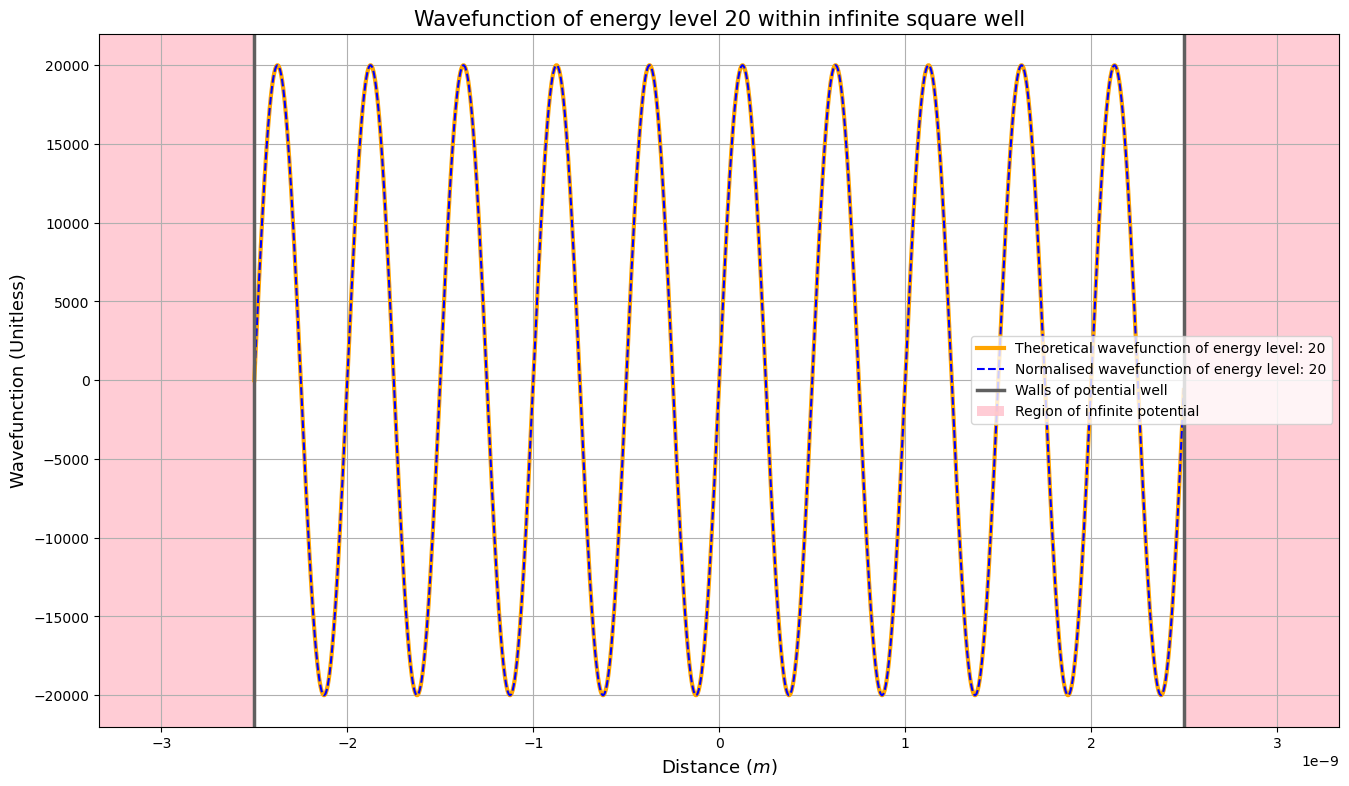

In [15]:
En = 20                                   # Desired energy level 
Enlevels=[0]                              # List of energy levels 


En_l = 0                                  # Initial boundaries for the secant method                        
En_h = e / 50                    
j=1                                       # Factor value for energy boundaries

# This loop iterates the secant method until the desired amount of energy level is found
while len(Enlevels) < En + 1 :                              # En + 1 because 0 is present in the list                              
    psi1 = RungeKutta2d(schrodinger,En_l)[0,n]

    psi2 = RungeKutta2d(schrodinger,En_h)[0,n]

    tolerance = e/1000000                                   # Tolerance for convergence
    # Secant method
    while abs(En_h - En_l) > tolerance:
        Elvl = En_h - psi2 * (En_h - En_l)/(psi2-psi1)
        # update initial energy for the next iteration
        En_l = En_h
        En_h = Elvl
        # and recalculate positions
        psi1 = RungeKutta2d(schrodinger,En_l)[0,n]
        psi2 = RungeKutta2d(schrodinger,En_h)[0,n]
        
    # If statement checking if the newly found energy is unique (A higher energy level)   
    if abs(Elvl - Enlevels[-1]) >= tolerance:              
        Enlevels.append(Elvl)
        j=1
        En_l = 0
        En_h = Enlevels[-1] + (Enlevels[-1] - Enlevels[-2])
        
    # Checking if the newly found energy is equal to the previously found energy
    else:                                                
        if abs(Elvl - Enlevels[-1]) < tolerance:
            print(f"Newly found energy level {len(Enlevels)} is approximately equal to energy level {len(Enlevels)-1}."
                  " Recalculating with higher boundary values.")
        j= j + 0.5            # Factor increasing the upper boundary everytime the boundary was underestimated
        En_l = 0
        En_h = Enlevels[-1] + (Enlevels[-1] - Enlevels[-2]) * (j)  # Setting a higher guessed boundary
        

print(f"Energy level {len(Enlevels)-1} is: {Enlevels[-1]:.3e} J or {Enlevels[-1]/e:.3f} eV")       

# Normalising the wavefunction
I = Integral(np.abs(RungeKutta2d(schrodinger,Enlevels[-1])[0])**2,h)
normwave = RungeKutta2d(schrodinger,Enlevels[-1])[0] / np.sqrt(I)

# Plotting the wavefunction within the confinement
plt.figure(figsize = (16,9))
plt.plot(xrange,theory(xrange,len(Enlevels) -1,d),lw =3,c='orange',
         label = (f'Theoretical wavefunction of energy level: {len(Enlevels) -1}'))
plt.plot(xplotpoints,normwave,ls = "--",c= 'blue',label=(f'Normalised wavefunction of energy level: {len(Enlevels) -1}'))

plt.title(f"Wavefunction of energy level {len(Enlevels) -1} within infinite square well" ,fontsize= 15)
plt.ylabel("Wavefunction (Unitless)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.axvline(x=-a,c= '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c= '#5f5f5f',ls='-',lw=2.5,label= 'Walls of potential well')
plt.xlim(left = -2*d/3, right=2*d/3)
plt.axvspan( -a,-2*d/3, color='pink', alpha=0.8, lw=0, label = "Region of infinite potential")
plt.axvspan( a,2*d/3, color='pink', alpha=0.8, lw=0)
plt.grid()
plt.legend();

Newly found energy level 2 is approximately equal to energy level 1. Recalculating with higher boundary values.
Energy level 28 is: 1.889e-18 J or 11.792 eV


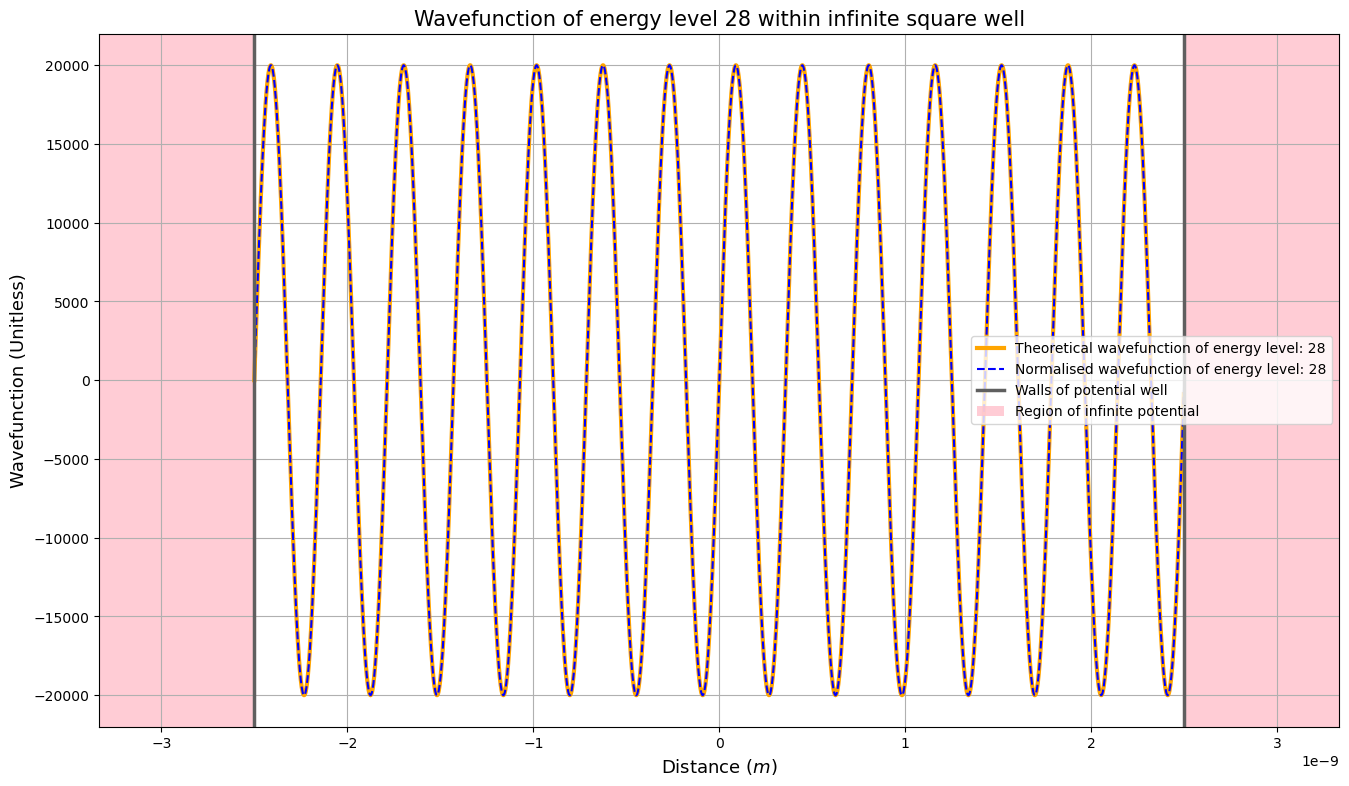

In [16]:
En = 28                                   # Desired energy level 
Enlevels=[0]                              # List of energy levels 


En_l = 0                                  # Initial boundaries for the secant method                        
En_h = e / 50                    
j=1                                       # Factor value for energy boundaries

# This loop iterates the secant method until the desired amount of energy level is found
while len(Enlevels) < En + 1 :                              # En + 1 because 0 is present in the list                              
    psi1 = RungeKutta2d(schrodinger,En_l)[0,n]

    psi2 = RungeKutta2d(schrodinger,En_h)[0,n]

    tolerance = e/1000000                                   # Tolerance for convergence
    # Secant method
    while abs(En_h - En_l) > tolerance:
        Elvl = En_h - psi2 * (En_h - En_l)/(psi2-psi1)
        # update initial energy for the next iteration
        En_l = En_h
        En_h = Elvl
        # and recalculate positions
        psi1 = RungeKutta2d(schrodinger,En_l)[0,n]
        psi2 = RungeKutta2d(schrodinger,En_h)[0,n]
        
    # If statement checking if the newly found energy is unique (A higher energy level)   
    if abs(Elvl - Enlevels[-1]) >= tolerance:              
        Enlevels.append(Elvl)
        j=1
        En_l = 0
        En_h = Enlevels[-1] + (Enlevels[-1] - Enlevels[-2])
        
    # Checking if the newly found energy is equal to the previously found energy
    else:                                                
        if abs(Elvl - Enlevels[-1]) < tolerance:
            print(f"Newly found energy level {len(Enlevels)} is approximately equal to energy level {len(Enlevels)-1}."
                  " Recalculating with higher boundary values.")
        j= j + 0.5            # Factor increasing the upper boundary everytime the boundary was underestimated
        En_l = 0
        En_h = Enlevels[-1] + (Enlevels[-1] - Enlevels[-2]) * (j)  # Setting a higher guessed boundary
        

print(f"Energy level {len(Enlevels)-1} is: {Enlevels[-1]:.3e} J or {Enlevels[-1]/e:.3f} eV")       

# Normalising the wavefunction
I = Integral(np.abs(RungeKutta2d(schrodinger,Enlevels[-1])[0])**2,h)
normwave = RungeKutta2d(schrodinger,Enlevels[-1])[0] / np.sqrt(I)

# Plotting the wavefunction within the confinement
plt.figure(figsize = (16,9))
plt.plot(xrange,theory(xrange,len(Enlevels) -1,d),lw =3,c='orange',
         label = (f'Theoretical wavefunction of energy level: {len(Enlevels) -1}'))
plt.plot(xplotpoints,normwave,ls = "--",c= 'blue',label=(f'Normalised wavefunction of energy level: {len(Enlevels) -1}'))

plt.title(f"Wavefunction of energy level {len(Enlevels) -1} within infinite square well" ,fontsize= 15)
plt.ylabel("Wavefunction (Unitless)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.axvline(x=-a,c= '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c= '#5f5f5f',ls='-',lw=2.5,label= 'Walls of potential well')
plt.xlim(left = -2*d/3, right=2*d/3)
plt.axvspan( -a,-2*d/3, color='pink', alpha=0.8, lw=0, label = "Region of infinite potential")
plt.axvspan( a,2*d/3, color='pink', alpha=0.8, lw=0)
plt.grid()
plt.legend();

##  2.5 Extention to three dimension



The analysis of quantum dots in real-life scenarios must take into account three-dimensional structures. The analytical solution for the energy states of a cubic quantum dot with a side length of d can be expressed as

$$
E_{n_x,n_y,n_z} = \frac{\pi^2 \hbar^2 }{2m d ^2}{(n_x^2 + n_y^2 +n_z^2)} \qquad
(10) \qquad [2]
$$


In [17]:
def quantumdot3d(n1,n2,n3,m,d):
    '''Function calculating the analytic solution of a 3 dimensional cubic quantum dot with sidelength d.
    Input:
    n1: energy quantum number in x direction  (Type: integer) (Units: unitless)
    n2: energy quantum number in y direction  (Type: integer) (Units: unitless)
    n3: energy quantum number in z direction  (Type: integer) (Units: unitless)
    m: mass of particle (Type: float) (Units: Kg)
    d: sidelength of cubic quantum dot (Type: float)(Units: m)
    
    Output:
    E3d : The energy level of the cubic quantum dot (Type: float) (Units: J)
    '''
    E3d = ((n1 ** 2) + (n2 ** 2) + (n3 ** 2)) * (np.pi ** 2) * (hbar ** 2) / 2 / m / (d ** 2)
    return E3d

The energy levels of a 3D cubic quantum dot are determined by the sum of the squared values of the quantum numbers for each dimension. As a result, energy levels are degenerate for different orientations that contribute to the same sum, such as (2,1,1) and (1,1,2). Therefore, for the first ten energy levels, the first ten distinct energy eigenstates were calculated.

In [18]:
# First ten energy levels
a1 = quantumdot3d(1,1,1,m,d)
b1 = quantumdot3d(2,1,1,m,d)
c1 = quantumdot3d(2,2,1,m,d)
d1 = quantumdot3d(3,1,1,m,d)
e1 = quantumdot3d(2,2,2,m,d)
f1 = quantumdot3d(3,2,1,m,d)
g1 = quantumdot3d(3,2,2,m,d)
h1 = quantumdot3d(3,3,1,m,d)
i1 = quantumdot3d(3,3,2,m,d)
j1 = quantumdot3d(3,3,3,m,d)

threedenergylevels = np.array([a1,b1,c1,d1,e1,f1,g1,h1,i1,j1])

z = 1
for i in threedenergylevels:
    print (f"The energy eigenstate {z} of a 3D quantum dot is: {i/e:.3f} eV")
    z = z + 1


The energy eigenstate 1 of a 3D quantum dot is: 0.045 eV
The energy eigenstate 2 of a 3D quantum dot is: 0.090 eV
The energy eigenstate 3 of a 3D quantum dot is: 0.135 eV
The energy eigenstate 4 of a 3D quantum dot is: 0.165 eV
The energy eigenstate 5 of a 3D quantum dot is: 0.180 eV
The energy eigenstate 6 of a 3D quantum dot is: 0.211 eV
The energy eigenstate 7 of a 3D quantum dot is: 0.256 eV
The energy eigenstate 8 of a 3D quantum dot is: 0.286 eV
The energy eigenstate 9 of a 3D quantum dot is: 0.331 eV
The energy eigenstate 10 of a 3D quantum dot is: 0.406 eV


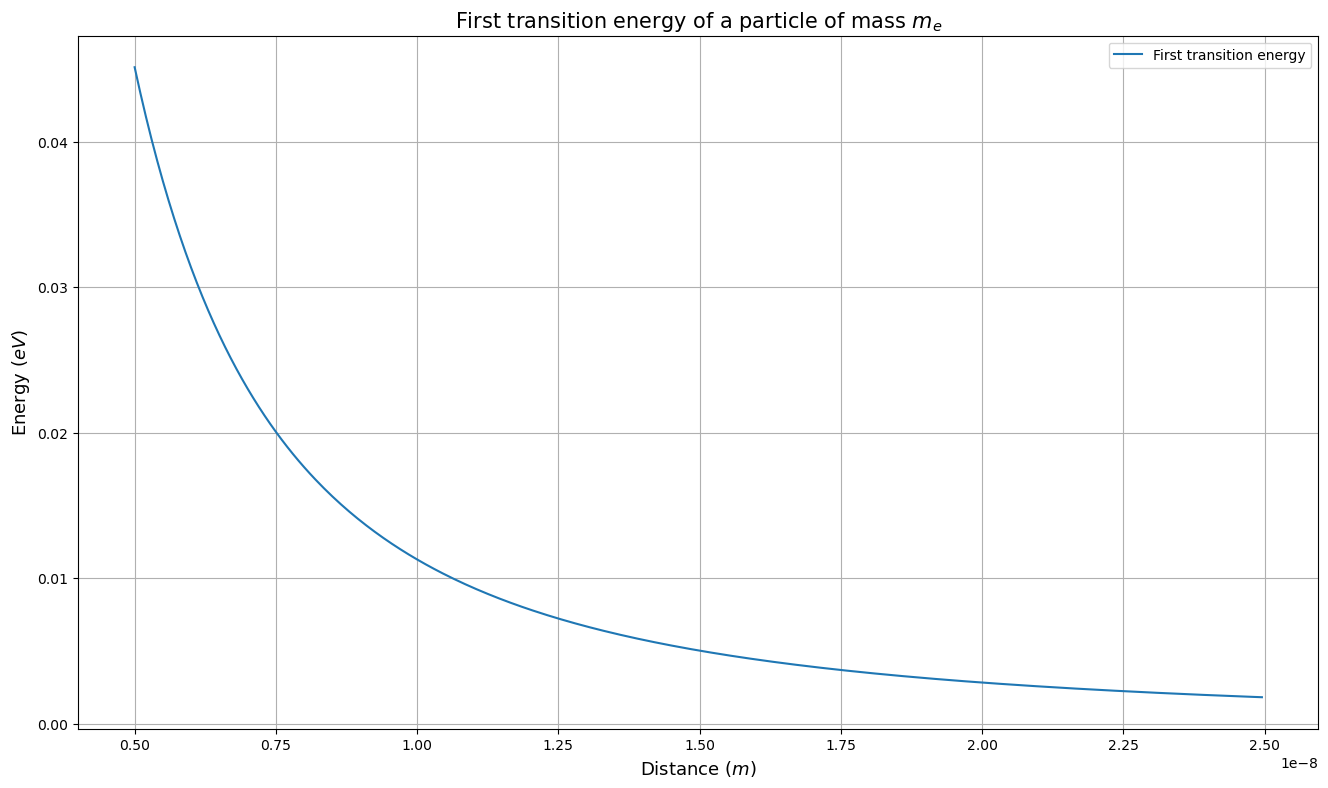

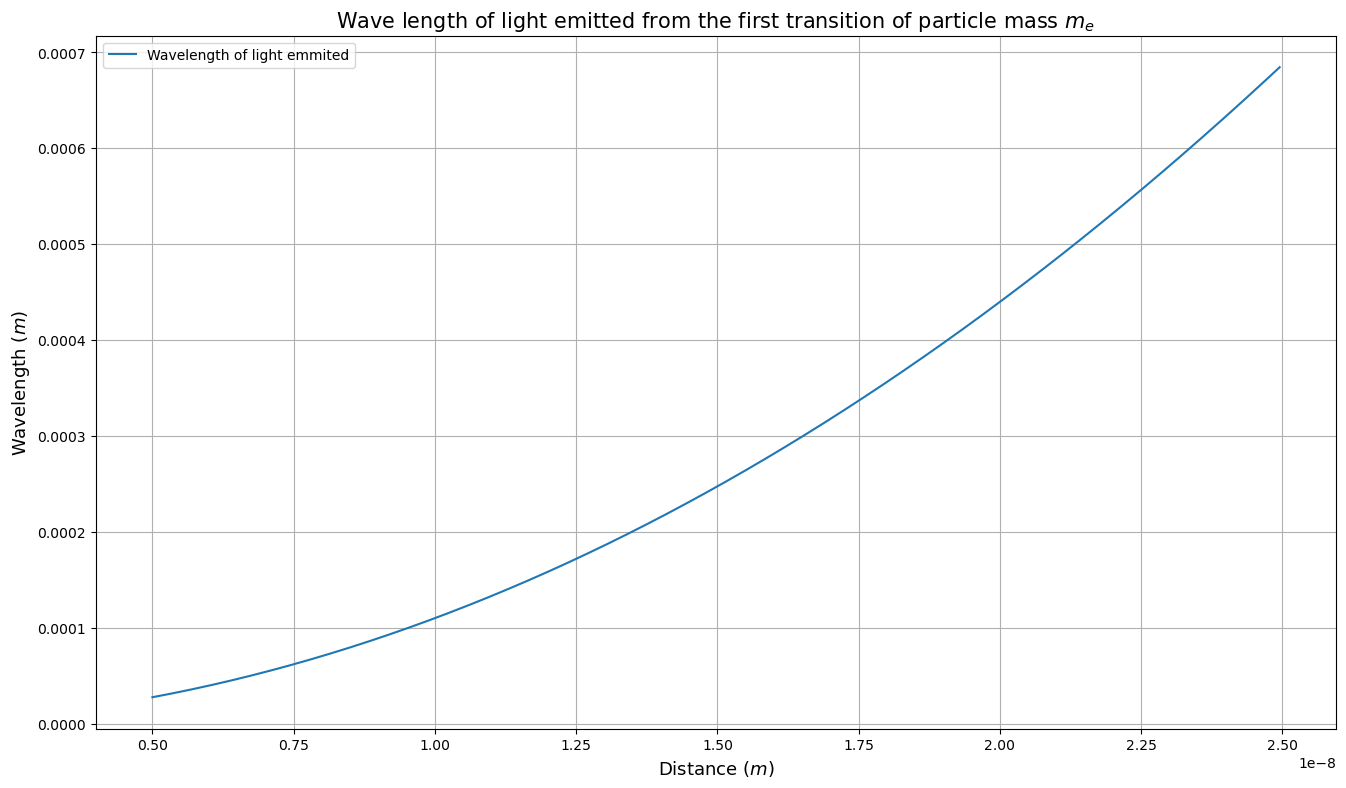

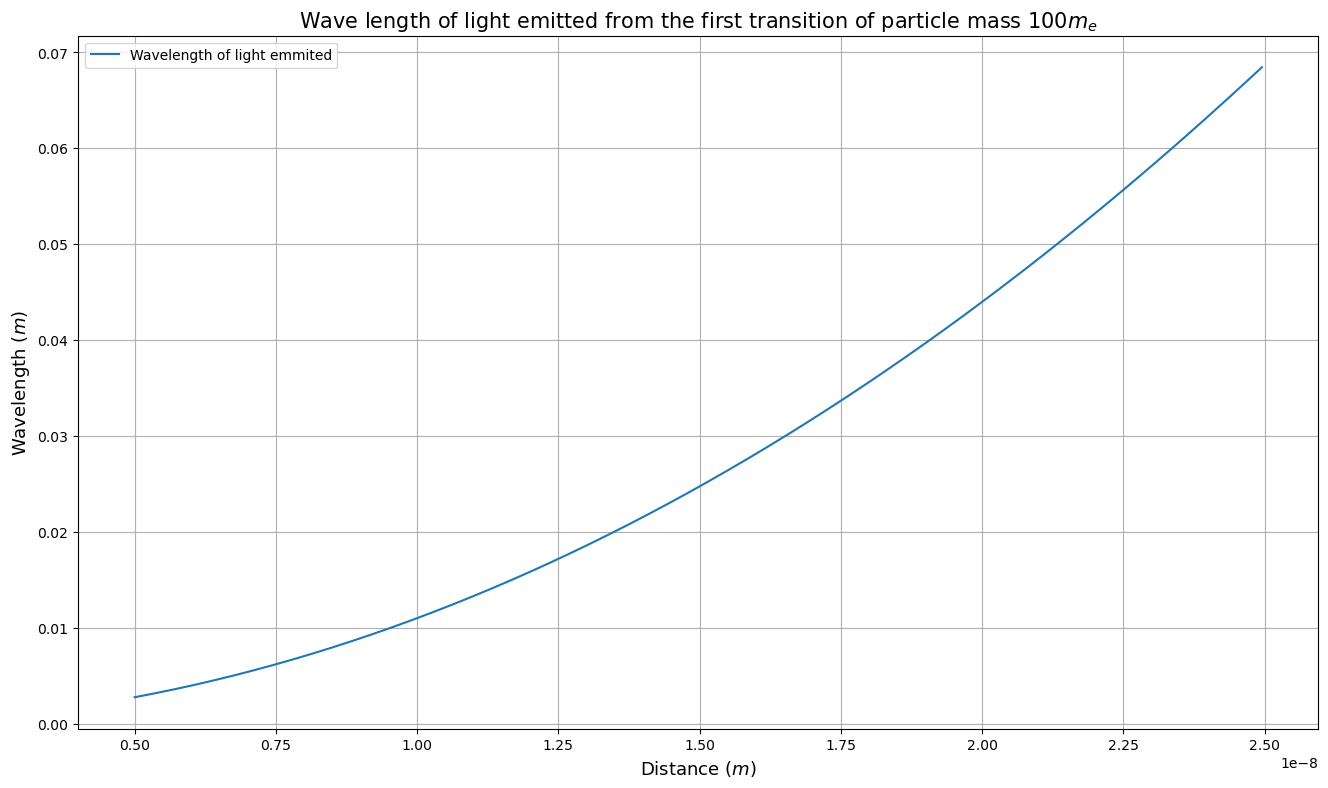

In [19]:
drange = np.arange(d, d * 5, d/100)
lightemit = []
for i in drange:
    lightemit.append(quantumdot3d(2,1,1,m,i) - quantumdot3d(1,1,1,m,i))

wavelength = hbar * 2* np.pi * 3 * 10 ** 8 / np.array(lightemit)
plt.figure(figsize = (16,9))
plt.plot(drange,np.array(lightemit)/e,label = 'First transition energy')
plt.title("First transition energy of a particle of mass $m_e$" ,fontsize= 15)
plt.ylabel("Energy ($eV$)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.grid()
plt.legend()

plt.figure(figsize = (16,9))
plt.plot(drange,wavelength,label = 'Wavelength of light emmited')
plt.title("Wave length of light emitted from the first transition of particle mass $m_e$ " ,fontsize= 15)
plt.ylabel("Wavelength ($m$)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.grid()
plt.legend()

lightemit_100 = []
for i in drange:
    lightemit_100.append(quantumdot3d(2,1,1,100*m,i) - quantumdot3d(1,1,1,100*m,i))

wavelength_100 = hbar * 2* np.pi * 3 * 10 ** 8 / np.array(lightemit_100)
plt.figure(figsize = (16,9))
plt.plot(drange,wavelength_100,label = 'Wavelength of light emmited')

plt.title("Wave length of light emitted from the first transition of particle mass $100m_e$" ,fontsize= 15)
plt.ylabel("Wavelength ($m$)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.grid()
plt.legend()

The properties of a quantum dot play a crucial role in determining the characteristics of the emitted light during energy level transitions. For instance, in the case of the first energy transition from $E_{211}$ to $E_{111}$, the transition energy decreases exponentially with increasing diameter $d$ of the quantum dot. The plot of the particle mass $m_e$ reveals that for diameters ranging from $d$ to $5d$, the light emission for the first transition falls in the infrared region, with wavelengths ranging from 15 to 1000 $\mu$m. In contrast, for larger particle masses, such as $100m_e$, the wavelength plot shows that the first transition leads to the emission of light in the microwave region. Therefore, we can infer that as the diameter of the quantum dot increases, the wavelength of the emitted light also increases, and as the mass of the particle in the quantum well increases, the wavelength of the emitted light also increases.

# 3. Applying to different potentials

## 3-1 Harmonic potential

To look at the implication of different potential types affecting the wavefunction, two new types of potentials will be studied. The first potential studied will be the harmonic potential which is given by

$$
V(x) = V_0 \frac{x^2}{a^2}\qquad
(11) \qquad [2]
$$

In [20]:
def harmonicpotential(x):
    '''Function calculating harmonic potential value in region -a < x < a
    Input:
    x: x points (Type: array)(Units: m)
    
    Output:
    V : The harmonic potential value (Type: float) (Units: J)
    '''
    V =  e * (x**2) / (a ** 2)
    return V

In [21]:
def harmonicschrodinger(r,x,E): 
    '''Function splitting the Schordinger equation into two ODEs and calculating the values for psi and phi wavefunctions under
       harmonic potenial
    Inputs:
    r: vector of wavefunction value of psi (r[0]) and wave function value of phi (r[1]) (Type: 2D- array) (Units: unitless)
    x: xrange required by the form of our general Runge Kutta function (Type: list) (Units: m)
    E: Energy value (Type: float) (Units: J)
    
    Output:
    np.array([fksi,fphi]): Array of each differential values of our ODEs (Type: np.array) (Units: unitless)
    '''
    psi = r[0]                                                     # psi wave function
    phi = r[1]                                                    # phi wave function
    fpsi = phi                                                    # dpsi/dx  Equation (4)
    fphi = 2 * m / (hbar **2) * (harmonicpotential(x)- E) * psi  # dphi/dx  Equation (5)
    return np.array([fpsi,fphi]) 

Energy level 1 is: 1.251e-20 J or 0.078 eV
Energy level 2 is: 3.753e-20 J or 0.234 eV
Energy level 3 is: 6.261e-20 J or 0.391 eV
Energy level 6 is: 1.426e-19 J or 0.890 eV


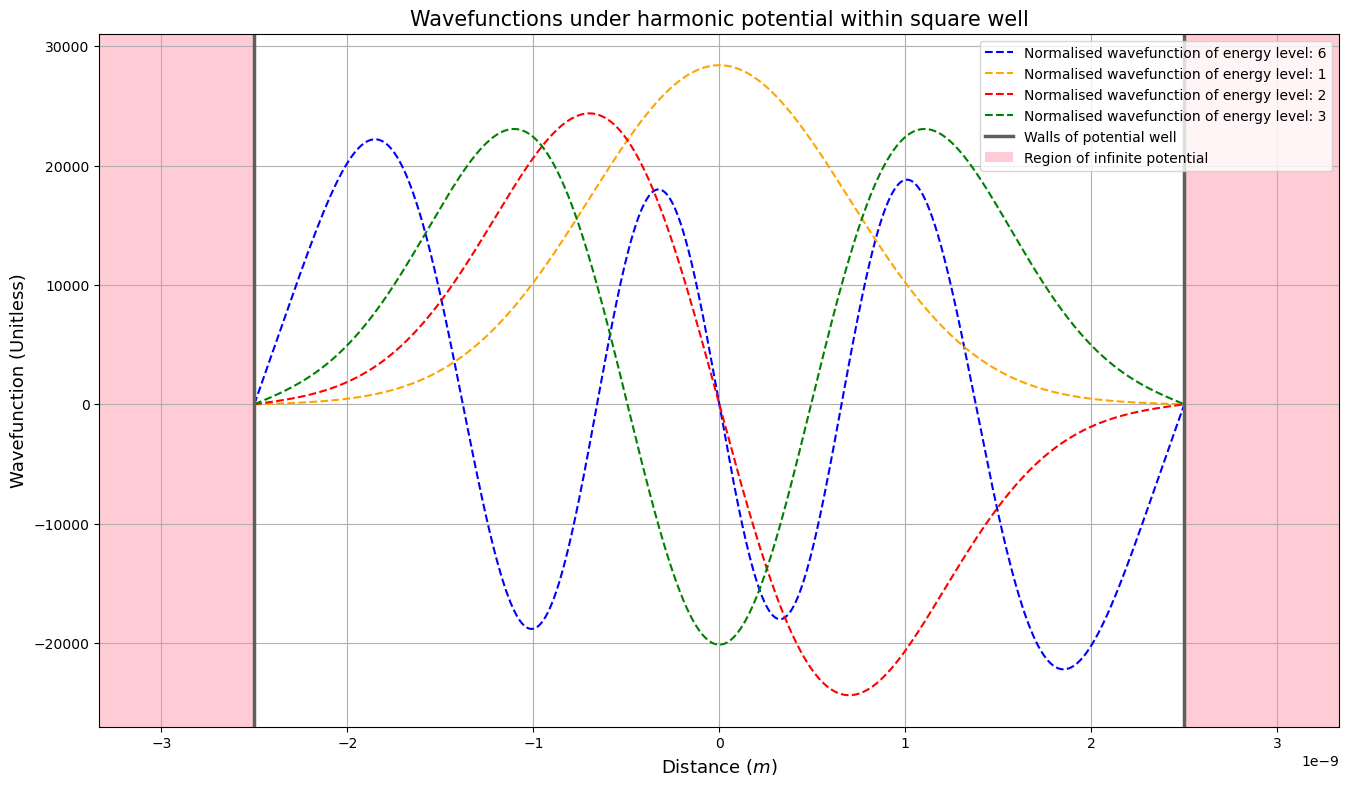

In [22]:
En_harmonic = 6                           # Desired energy level 
Enlevels_h=[0]                            # List of energy levels 


En_l = 0                                  # Initial boundaries for the secant method                        
En_h = e / 50                    
j=1                                       # Factor value for energy boundaries

# This loop iterates the secant method until the desired amount of energy level is found
while len(Enlevels_h) < En_harmonic + 1 :                              # En + 1 because 0 is present in the list        
    psi1 = RungeKutta2d(harmonicschrodinger,En_l)[0,n]

    psi2 = RungeKutta2d(harmonicschrodinger,En_h)[0,n]

    tolerance = e / 1000000                                   # Tolerance for convergence
    # Secant method
    while abs(En_h - En_l) > tolerance:
        Elvl = En_h - psi2 * (En_h - En_l)/(psi2-psi1)
        # update initial energy for the next iteration
        En_l = En_h
        En_h = Elvl
        # and recalculate positions
        psi1 = RungeKutta2d(harmonicschrodinger,En_l)[0,n]
        psi2 = RungeKutta2d(harmonicschrodinger,En_h)[0,n]
        
    # If statement checking if the newly found energy is unique (A higher energy level)   
    if abs(Elvl - Enlevels_h[-1]) >= tolerance:              
        Enlevels_h.append(Elvl)
        j=1
        En_l = 0
        En_h = Enlevels_h[-1] + (Enlevels_h[-1] - Enlevels_h[-2])
        
    # Checking if the newly found energy is equal to the previously found energy
    else:                                                
        if abs(Elvl - Enlevels_h[-1]) < tolerance:
            print(f"Newly found energy level {len(Enlevels_h)} is approximately equal to energy level {len(Enlevels_h)-1}."
                  " Recalculating with higher boundary values.")
        j= j + 0.5            # Factor increasing the upper boundary everytime the boundary was underestimated
        En_l = 0
        En_h = Enlevels_h[-1] + (Enlevels_h[-1] - Enlevels_h[-2]) * (j)  # Setting a higher guessed boundary
        
print(f"Energy level 1 is: {Enlevels_h[1]:.3e} J or {Enlevels_h[1]/e:.3f} eV") 
print(f"Energy level 2 is: {Enlevels_h[2]:.3e} J or {Enlevels_h[2]/e:.3f} eV")  
print(f"Energy level 3 is: {Enlevels_h[3]:.3e} J or {Enlevels_h[3]/e:.3f} eV")    
print(f"Energy level {len(Enlevels_h) -1} is: {Enlevels_h[-1]:.3e} J or {Enlevels_h[-1]/e:.3f} eV")       

# Normalising the wavefunction
I = Integral(np.abs(RungeKutta2d(harmonicschrodinger,Enlevels_h[-1])[0])**2,h)
normwave = RungeKutta2d(harmonicschrodinger,Enlevels_h[-1])[0] / np.sqrt(I)
I2 = Integral(np.abs(RungeKutta2d(harmonicschrodinger,Enlevels_h[1])[0])**2,h)
normwave2 = RungeKutta2d(harmonicschrodinger,Enlevels_h[1])[0] / np.sqrt(I2)
I3 = Integral(np.abs(RungeKutta2d(harmonicschrodinger,Enlevels_h[2])[0])**2,h)
normwave3 = RungeKutta2d(harmonicschrodinger,Enlevels_h[2])[0] / np.sqrt(I3)
I4 = Integral(np.abs(RungeKutta2d(harmonicschrodinger,Enlevels_h[3])[0])**2,h)
normwave4 = RungeKutta2d(harmonicschrodinger,Enlevels_h[3])[0] / np.sqrt(I4)


# Plotting the wavefunction within the confinement
plt.figure(figsize = (16,9))
plt.plot(xplotpoints,normwave,ls = "--",c= 'blue',label=(f'Normalised wavefunction of energy level: {len(Enlevels_h) -1}'))
plt.plot(xplotpoints,normwave2,ls = "--",c= 'orange',label=(f'Normalised wavefunction of energy level: 1'))
plt.plot(xplotpoints,normwave3,ls = "--",c= 'red',label=(f'Normalised wavefunction of energy level: 2'))
plt.plot(xplotpoints,normwave4,ls = "--",c= 'green',label=(f'Normalised wavefunction of energy level: 3'))

plt.title(f"Wavefunctions under harmonic potential within square well" ,fontsize= 15)
plt.ylabel("Wavefunction (Unitless)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.axvline(x=-a,c= '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c= '#5f5f5f',ls='-',lw=2.5,label= 'Walls of potential well')
plt.xlim(left = -2*d/3, right=2*d/3)
plt.axvspan( -a,-2*d/3, color='pink', alpha=0.8, lw=0, label = "Region of infinite potential")
plt.axvspan( a,2*d/3, color='pink', alpha=0.8, lw=0)
plt.grid()
plt.legend();

Comparing the numerically calculated wave functions and energy eigen values to the analytical solutions of the harmonic potential

$$
\psi_n(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n\left(\sqrt{\frac{m\omega}{\hbar}}x\right) e^{-\frac{m\omega x^2}{2\hbar}} \qquad
(12) \qquad[5]
$$

Numerically calculated energy level 1 is: 1.251e-20 J or 0.078 eV
Analytically calculated energy level 1 is: 1.251e-20 J or 0.078 eV
Numerically calculated energy level 2 is : 3.753e-20 J or 0.234 eV
Analytically calculated energy level 2 is: 3.753e-20 J or 0.234 eV
Numerically calculated energy level 3 is : 6.261e-20 J or 0.391 eV
Analytically calculated energy level 3 is: 6.255e-20 J or 0.390 eV


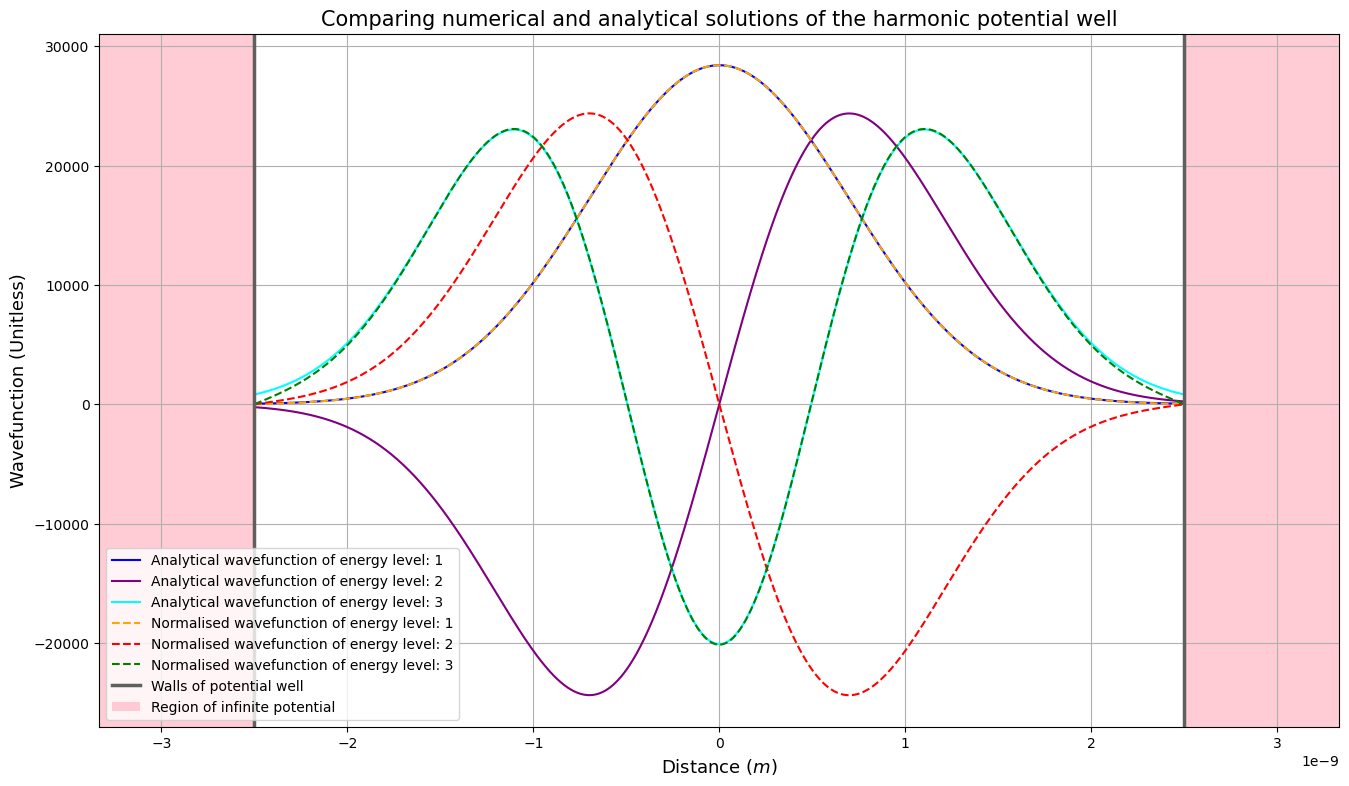

In [23]:
# Calculating the analytic solution of harmonic potential equation (12) [5]
k = 2 * e / a ** 2
omega = np.sqrt(k/m)
alpha = omega * m / hbar    
y= np.sqrt(alpha) * xrange 

# Calculating harmonic wave function of energy level 1,2,3 using hermite polynomials
harmonicspsi0 =(alpha / np.pi)** 0.25 * np.e ** (-y**2 / 2) 
harmonicspsi1 =(alpha / np.pi)** 0.25 * np.e ** (-y**2 / 2) *np.sqrt(2) * y
harmonicspsi2 =(alpha / np.pi)** 0.25 * np.e ** (-y**2 / 2) / np.sqrt(2) * (2*y**2 -1)


plt.figure(figsize = (16,9))
plt.plot(xrange,harmonicspsi0,c= 'blue',label=(f'Analytical wavefunction of energy level: 1'))
plt.plot(xrange,harmonicspsi1,c= 'purple',label=(f'Analytical wavefunction of energy level: 2'))
plt.plot(xrange,harmonicspsi2,c= 'cyan',label=(f'Analytical wavefunction of energy level: 3'))

plt.plot(xplotpoints,normwave2,ls = "--",c= 'orange',label=(f'Normalised wavefunction of energy level: 1'))
plt.plot(xplotpoints,normwave3,ls = "--",c= 'red',label=(f'Normalised wavefunction of energy level: 2'))
plt.plot(xplotpoints,normwave4,ls = "--",c= 'green',label=(f'Normalised wavefunction of energy level: 3'))

plt.title(f"Comparing numerical and analytical solutions of the harmonic potential well" ,fontsize= 15)
plt.ylabel("Wavefunction (Unitless)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.axvline(x=-a,c= '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c= '#5f5f5f',ls='-',lw=2.5,label= 'Walls of potential well')
plt.xlim(left = -2*d/3, right=2*d/3)
plt.axvspan( -a,-2*d/3, color='pink', alpha=0.8, lw=0, label = "Region of infinite potential")
plt.axvspan( a,2*d/3, color='pink', alpha=0.8, lw=0)
plt.grid()
plt.legend();

print(f"Numerically calculated energy level 1 is: {Enlevels_h[1]:.3e} J or {Enlevels_h[1]/e:.3f} eV") 
print(f"Analytically calculated energy level 1 is: {hbar*omega/2:.3e} J or {hbar*omega/2/e:.3f} eV") 
print(f"Numerically calculated energy level 2 is : {Enlevels_h[2]:.3e} J or {Enlevels_h[2]/e:.3f} eV")
print(f"Analytically calculated energy level 2 is: {hbar*omega/2*3:.3e} J or {hbar*omega/2/e*3:.3f} eV") 
print(f"Numerically calculated energy level 3 is : {Enlevels_h[3]:.3e} J or {Enlevels_h[3]/e:.3f} eV") 
print(f"Analytically calculated energy level 3 is: {hbar*omega/2*5:.3e} J or {hbar*omega/2/e*5:.3f} eV") 


The first and second energy level wavefunctions calculated numerically match perfectly with the analytical solution of the harmonic potential. However, the third energy level wavefunction seems to display the issue of reversed signs caused by the normalization method. The energy values of the first and second energy eigenstates obtained numerically are identical to the analytical solutions. However, the energy value of the third eigenstate differs by 0.001$eV$ from the analytical solution. This highlights a problem with the numerical method, where tolerance levels create a boundary of uncertainty.

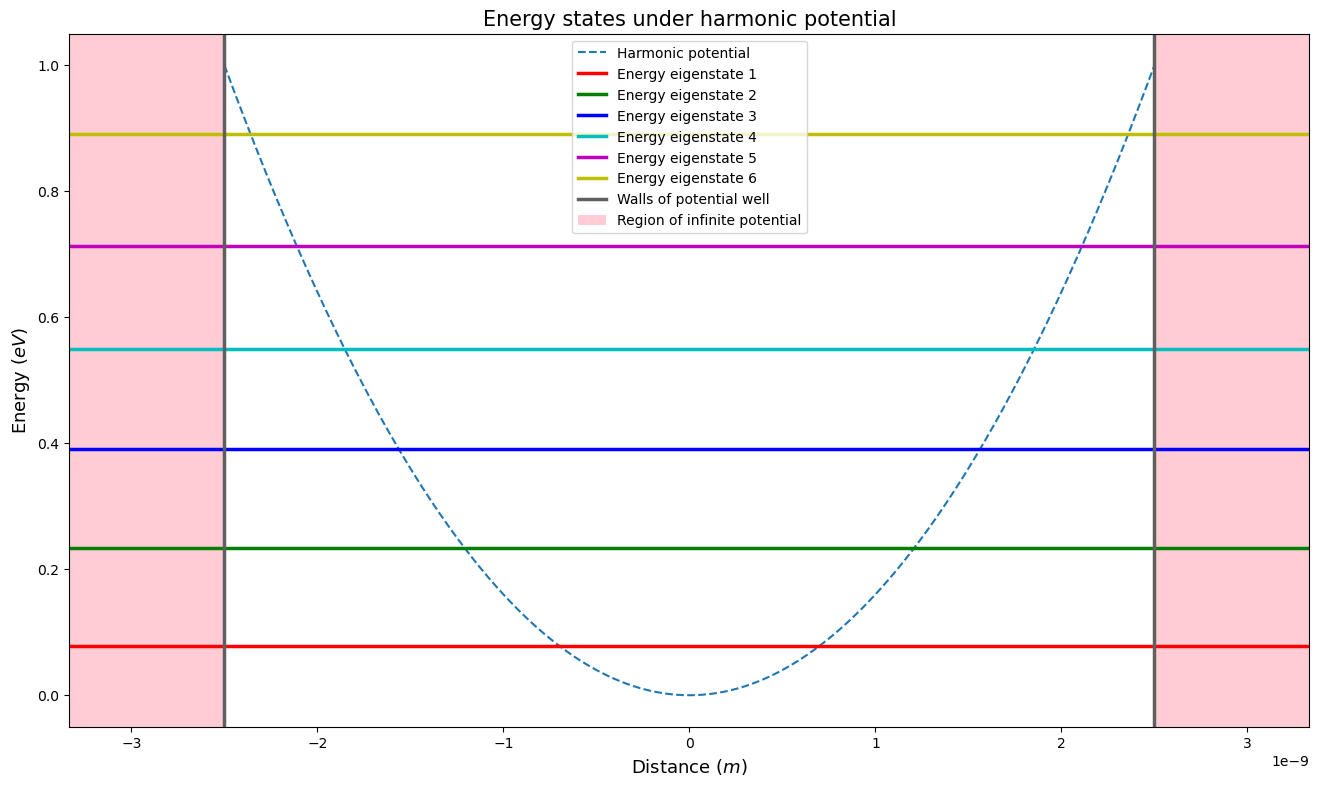

In [24]:
plt.figure(figsize = (16,9))
plt.plot(xrange,harmonicpotential(xrange)/e,ls = '--', label="Harmonic potential")
plt.title("Energy states under harmonic potential" ,fontsize= 15)
plt.ylabel("Energy ($eV$)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
t = 1
colors = ['r', 'g', 'b', 'c', 'm', 'y','k','tab:purple','tab:olive']  # assign a list of colors for each energy level
for i, energy_level in enumerate(Enlevels_h[1:]):
    color_index = i % len(colors)  # use modulus operator to loop through the colors list
    plt.axhline(y=energy_level/e, c=colors[color_index], ls='-', lw=2.5, label=f"Energy eigenstate {t}")
    t += 1
plt.axvline(x=-a,c= '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c= '#5f5f5f',ls='-',lw=2.5,label= 'Walls of potential well')
plt.xlim(left = -2*d/3, right=2*d/3)
plt.axvspan( -a,-2*d/3, color='pink', alpha=0.8, lw=0, label = "Region of infinite potential")
plt.axvspan( a,2*d/3, color='pink', alpha=0.8, lw=0)
plt.legend()

It is also evident from the plots that the energy levels of the system under a harmonic potential are evenly spaced, in agreement with the analytical theory.

## 3-2 Finite square well embedded within infinite square well

The second potential studied will be a finite square well embedded within the original infinite potential well. The potential is given by

$$
V_x = \begin{cases} 0 & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases} \qquad
    (12) \qquad [2]
$$

In [25]:
def finitesquarepotential(x):
    '''Function calculating finite square potential region -a/2 < x < a/2 within infinite square well of region -a < x < a
    Input:
    x: x points (Type: array)(Units: m)
    
    Output:
    V : The finite square potential value (Type: array) (Units: J)
    '''
    V = np.zeros_like(x)  # create an array of zeros with the same shape as x
    V[abs(x) > a/2] = 4 * e   # set the values of V where the condition is true
    return V

In [26]:
def finiteschrodinger(r,x,E): 
    '''Function splitting the Schordinger equation into two ODEs and calculating the values for psi and phi wavefunctions under
       finite potential within an infinite potential
    Inputs:
    r: vector of wavefunction value of psi (r[0]) and wave function value of phi (r[1]) (Type: 2D- array) (Units: unitless)
    x: xrange required by the form of our general Runge Kutta function (Type: list) (Units: m)
    E: Energy value (Type: float) (Units: J)
    
    Output:
    np.array([fksi,fphi]): Array of each differential values of our ODEs (Type: np.array) (Units: unitless)
    '''
    psi = r[0]                                                        # psi wave function
    phi = r[1]                                                        # phi wave function
    fpsi = phi                                                        # dpsi/dx Equation (4)
    fphi = 2 * m / (hbar **2) * (finitesquarepotential(x)- E) * psi  # dphi/dx Equation (5)
    return np.array([fpsi,fphi]) 

Newly found energy level 2 is approximately equal to energy level 1. Recalculating with higher boundary values.
Energy eigenstate 1 is: 8.291e-21 J or 0.052 eV
Energy eigenstate 2 is: 3.313e-20 J or 0.207 eV
Energy eigenstate 3 is: 7.442e-20 J or 0.465 eV
Energy eigenstate 6 is: 2.944e-19 J or 1.837 eV


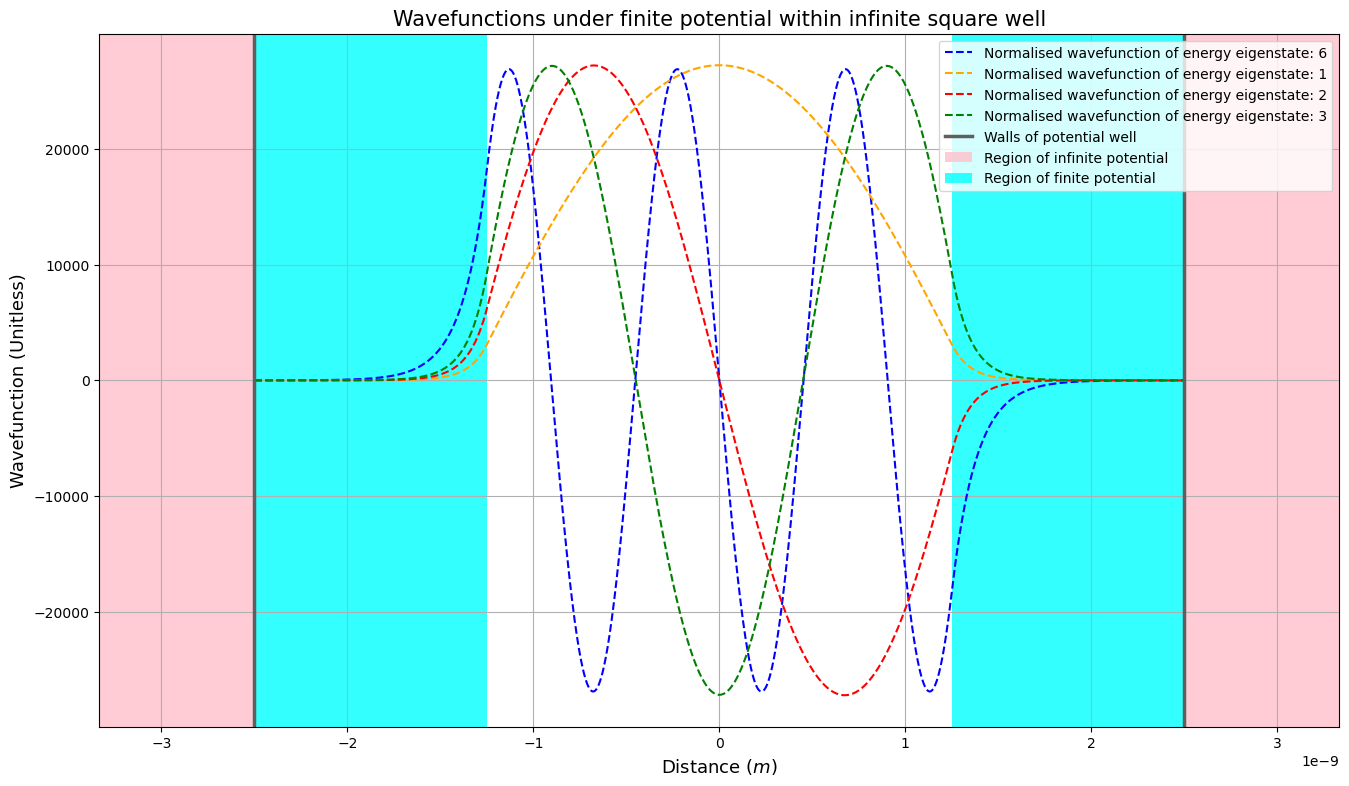

In [27]:
En_finite = 6                               # Desired  number of energy eigenstates 
Enlevels_f=[0]                              # List of energy eigenstates 


En_l = 0                                  # Initial boundaries for the secant method                        
En_h = e / 50                    
j=1                                       # Factor value for energy boundaries

# This loop iterates the secant method until the desired amount of energy eigenstate is found
while len(Enlevels_f) < En_finite + 1 :                              # En + 1 because 0 is present in the list    0             
    psi1 = RungeKutta2d(finiteschrodinger,En_l)[0,n]

    psi2 = RungeKutta2d(finiteschrodinger,En_h)[0,n]

    tolerance = e / 1000000                                   # Tolerance for convergence
    # Secant method
    while abs(En_h - En_l) > tolerance:
        Elvl = En_h - psi2 * (En_h - En_l)/(psi2-psi1)
        # update initial energy for the next iteration
        En_l = En_h
        En_h = Elvl
        # and recalculate positions
        psi1 = RungeKutta2d(finiteschrodinger,En_l)[0,n]
        psi2 = RungeKutta2d(finiteschrodinger,En_h)[0,n]
        
    # If statement checking if the newly found energy is unique (A higher energy level)   
    if abs(Elvl - Enlevels_f[-1]) >= tolerance:              
        Enlevels_f.append(Elvl)
        j=1
        En_l = 0
        En_h = Enlevels_f[-1] + (Enlevels_f[-1] - Enlevels_f[-2])
        
    # Checking if the newly found energy is equal to the previously found energy
    else:                                                
        if abs(Elvl - Enlevels_f[-1]) < tolerance:
            print(f"Newly found energy level {len(Enlevels_f)} is approximately equal to energy level {len(Enlevels_f)-1}."
                  " Recalculating with higher boundary values.")
        j= j + 0.5            # Factor increasing the upper boundary everytime the boundary was underestimated
        En_l = 0
        En_h = Enlevels_f[-1] + (Enlevels_f[-1] - Enlevels_f[-2]) * (j)  # Setting a higher guessed boundary
        

print(f"Energy eigenstate 1 is: {Enlevels_f[1]:.3e} J or {Enlevels_f[1]/e:.3f} eV") 
print(f"Energy eigenstate 2 is: {Enlevels_f[2]:.3e} J or {Enlevels_f[2]/e:.3f} eV")  
print(f"Energy eigenstate 3 is: {Enlevels_f[3]:.3e} J or {Enlevels_f[3]/e:.3f} eV")  
print(f"Energy eigenstate {len(Enlevels_f) -1} is: {Enlevels_f[-1]:.3e} J or {Enlevels_f[-1]/e:.3f} eV")  

# Normalising the wavefunction
I = Integral(np.abs(RungeKutta2d(finiteschrodinger,Enlevels_f[-1])[0])**2,h)
normwave = RungeKutta2d(finiteschrodinger,Enlevels_f[-1])[0] / np.sqrt(I)
I2 = Integral(np.abs(RungeKutta2d(finiteschrodinger,Enlevels_f[1])[0])**2,h)
normwave2 = RungeKutta2d(finiteschrodinger,Enlevels_f[1])[0] / np.sqrt(I2)
I3 = Integral(np.abs(RungeKutta2d(finiteschrodinger,Enlevels_f[2])[0])**2,h)
normwave3 = RungeKutta2d(finiteschrodinger,Enlevels_f[2])[0] / np.sqrt(I3)
I4 = Integral(np.abs(RungeKutta2d(finiteschrodinger,Enlevels_f[3])[0])**2,h)
normwave4 = RungeKutta2d(finiteschrodinger,Enlevels_f[3])[0] / np.sqrt(I4)

# Plotting the wavefunction within the confinement
plt.figure(figsize = (16,9))
plt.plot(xplotpoints,normwave,ls = "--",c= 'blue',label=(f'Normalised wavefunction of energy eigenstate: {len(Enlevels_f) -1}'))
plt.plot(xplotpoints,normwave2,ls = "--",c= 'orange',label=(f'Normalised wavefunction of energy eigenstate: 1'))
plt.plot(xplotpoints,normwave3,ls = "--",c= 'red',label=(f'Normalised wavefunction of energy eigenstate: 2'))
plt.plot(xplotpoints,normwave4,ls = "--",c= 'green',label=(f'Normalised wavefunction of energy eigenstate: 3'))

plt.title(f"Wavefunctions under finite potential within infinite square well" ,fontsize= 15)
plt.ylabel("Wavefunction (Unitless)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
plt.axvline(x=-a,c= '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c= '#5f5f5f',ls='-',lw=2.5,label= 'Walls of potential well')
plt.xlim(left = -2*d/3, right=2*d/3)
plt.axvspan( -a,-2*d/3, color='pink', alpha=0.8, lw=0, label = "Region of infinite potential")
plt.axvspan( a,2*d/3, color='pink', alpha=0.8, lw=0)
plt.axvspan( -a,-a/2, color='cyan', alpha=0.8, lw=0, label = "Region of finite potential")
plt.axvspan( a/2,a, color='cyan', alpha=0.8, lw=0)
plt.grid()
plt.legend();

The wavefunction calculated numerically for the finite potential within an infinite potential well exhibits a shape consistent with the expected wavefunction under finite potential.[6] However, due to the finite potential region's lack of strict confinement, the charge carrier's position is observed to extend to the classically forbidden region. This region is represented in cyan in the plot above, and the extended particle position decays exponentially.[7] The potential, mass of the particle, and energy level of the particle determine the steepness of the drop. The plot reveals that higher energy eigenstates' wavefunctions have a slower drop-off in the finite potential region compared to lower energy eigenstates' wavefunctions.

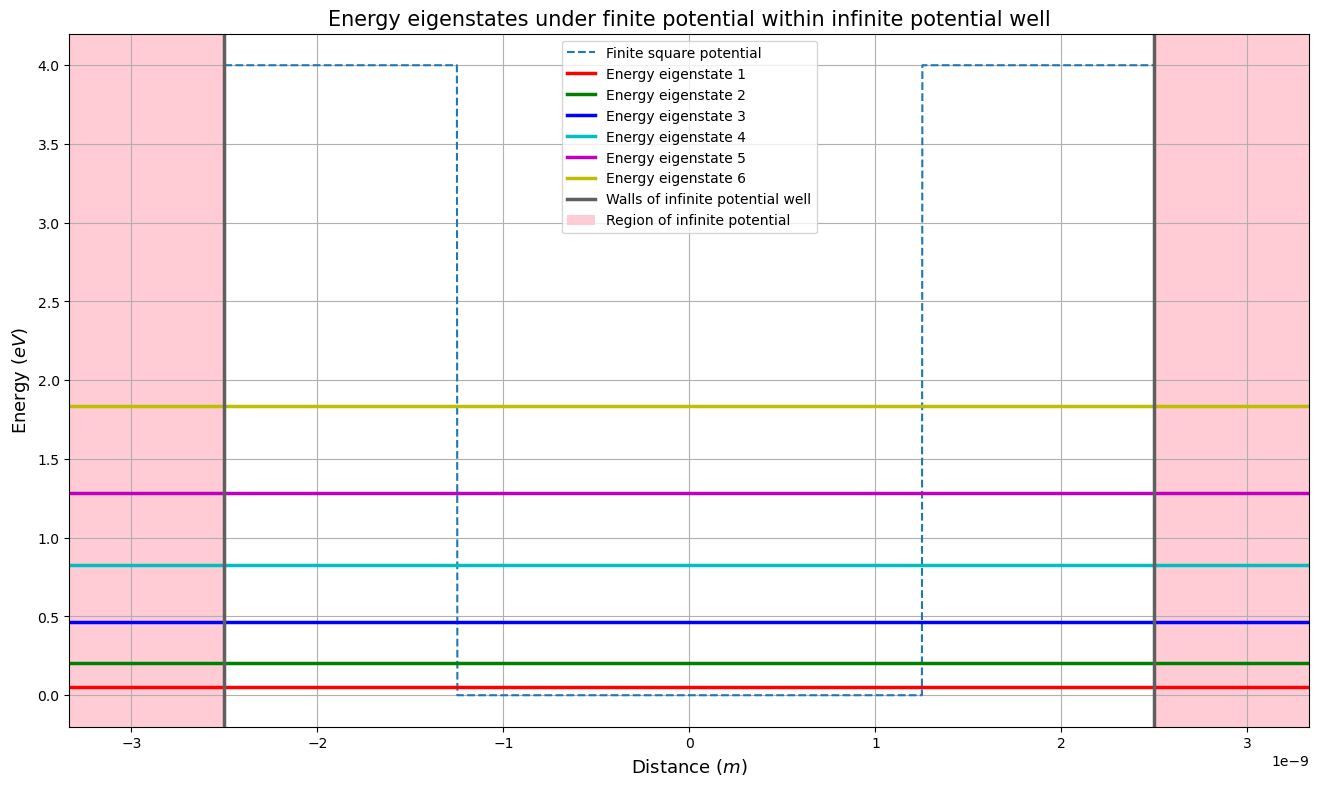

In [28]:
plt.figure(figsize = (16,9))
plt.plot(xrange,finitesquarepotential(xrange)/e,ls = '--', label="Finite square potential")
plt.title("Energy eigenstates under finite potential within infinite potential well" ,fontsize= 15)
plt.ylabel("Energy ($eV$)", fontsize = 13)
plt.xlabel("Distance ($m$)", fontsize = 13)
t = 1
colors = ['r', 'g', 'b', 'c', 'm', 'y','k','tab:purple','tab:olive']  # List of colors for each energy level
for i, energy_level in enumerate(Enlevels_f[1:]):
    color_index = i % len(colors)  
    plt.axhline(y=energy_level/e, c=colors[color_index], ls='-', lw=2.5, label=f"Energy eigenstate {t}")
    t += 1
plt.axvline(x=-a,c= '#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c= '#5f5f5f',ls='-',lw=2.5,label= 'Walls of infinite potential well')
plt.xlim(left = -2*d/3, right=2*d/3)

plt.axvspan( -a,-2*d/3, color='pink', alpha=0.8, lw=0, label = "Region of infinite potential")
plt.axvspan( a,2*d/3, color='pink', alpha=0.8, lw=0)
plt.grid()
plt.legend();

The energy level lines above represent the total energy of the particle, which determines its behavior in the finite potential region. Within the region of zero potential, the total energy of the particle is greater than the potential energy. However, in the finite potential region, the total energy of the particle is lower than the potential energy. If the total energy of the particle exceeds the finite potential energy, the wave function will exhibit a behavior similar to that of a wave function affected only by the infinite square potential.

# 4. Bibliography

 [1] Szumilo, Monika. 2023. " PHAS0029 Final Assignment 2023". [Online] Cocalc resource. Available from https://cocalc.com/projects/ad5e57d8-4e06-45d5-a0c5-d7864ee5eb55/files/Assignment%20C8%20-%20secant%20method/PHAS0029_Final_Assignment_2023.pdf [accessed 25th March 2023]

[2] Dash, L. 2020."PHAS0029FinalAssignmentSupplementaryNotebook" [Online] UCL Moodle resource. Available from https://moodle.ucl.ac.uk/course/view.php?id=32606&section=2#tabs-tree-start [accessed 25th March 2023]

[3] "RungeKuttaDerivation"  [Online] UCL Moodle resource. Available from https://moodle.ucl.ac.uk/course/view.php?id=32606&section=3#tabs-tree-start [accessed 25th March 2023]

[4] UCL SN: 18016575. 2023."PHAS0029CoCalcNotebook" [Online] CoCalc resource. Available from https://cocalc.com/projects/ad5e57d8-4e06-45d5-a0c5-d7864ee5eb55/home [accessed 25th March 2023]

[5] Thorne, R. Green, G.A., PHAS0022-Section4-Part2.pdf. Available at: https://moodle.ucl.ac.uk/course/view.php?id=30694  [accessed 25th March 2023]

[6] Thorne, R. Green, G.A., PHAS0022-Section4-Part1.pdf. Available at: https://moodle.ucl.ac.uk/course/view.php?id=30694  [accessed 25th March 2023]

[7] Rae, A.L.M., 2021. Quantum Mechanics, 6th ed. Bristol: IOP Publishing, Chapter 5.